In [114]:
import numpy as np
import matplotlib.pyplot as plot
import networkx as net
from numpy.linalg import eigh

In [115]:
def plot_metrics(communities,n_split,history_data):
    G_w=net.karate_club_graph()
    G=net.Graph()
    G.add_nodes_from(G_w.nodes())
    G.add_edges_from(G_w.edges())
    plot.figure(figsize=(10, 10))
    pos=net.spring_layout(G, seed=42)
    num_nodes = G.number_of_nodes()
    cmap = plot.colormaps.get_cmap('tab20')
    for i, g in enumerate(communities):
        color=cmap(i%20)
        net.draw(g, pos, with_labels=True, node_color=color, edge_color='gray', font_color='black',node_size=1000,width=2.0)
    plot.show()
    if n_split is None:
        print("Here are the metrics of the Karate Club Graph:")
        n_split=0
    else:
        print(f"Here are the values of the metrics after split {n_split}:")
    for i, g in enumerate(communities):
        centrality_dict=net.degree_centrality(g)
        betweenness_dict=net.betweenness_centrality(g)
        closeness_dict=net.closeness_centrality(g)
        clustering_dict=net.clustering(g)
        for node in g.nodes():
            history_data['degree'][node][n_split]=centrality_dict[node]
            history_data['betweenness'][node][n_split]=betweenness_dict[node]
            history_data['closeness'][node][n_split]=closeness_dict[node]
            history_data['clustering'][node][n_split]=clustering_dict[node]
    for i,g in enumerate(communities):
        centrality=sorted(net.degree_centrality(g).items(),key=lambda item:item[0])
        betweenness_centrality=sorted(net.betweenness_centrality(g).items(),key=lambda item:item[0])
        closeness_centrality=sorted(net.closeness_centrality(g).items(),key=lambda item:item[0])
        clustering_coefficient=sorted(net.clustering(g).items(),key=lambda item:item[0])      
        if n_split is not None:
            if i>0:
                print('-'*120)
            print(f"\nMetrics for Community {i+1} {list(g.nodes())}:")          
        print("Degree centrality:\n",centrality)
        print("Betweenness centrality:\n",betweenness_centrality)
        print("Closeness centrality:\n",closeness_centrality)
        print("Clustering co-efficient:\n",clustering_coefficient)            

In [116]:
def modularity(G,communities,n_split,history_data):
    node_list=sorted(G.nodes())
    A=net.to_numpy_array(G,nodelist=node_list)
    degrees=[G.degree(n,weight=None) for n in node_list]
    degree_vector=np.array(degrees)
    K=degree_vector.reshape(-1, 1)
    m=K.sum()/2
    n=K.size
    if m==0:
        return n_split
    B=A-(K@K.T)/(2*m)
    vals,vecs=eigh(B)
    index=np.argmax(vals)
    if vals[index]<=0:
        return n_split
    S=vecs[:,index]
    split1=[]
    split2=[]
    noise=[]
    for i in range(len(S)):
        id=node_list[i]
        if S[i]>0.0:
            split1.append(id)
        elif S[i]<0.0:
            split2.append(id)
        else:
            noise.append(id)
    if len(split1)==0 or len(split2)==0:
        return n_split
    G1=G.subgraph(split1).copy()
    G2=G.subgraph(split2).copy()
    if len(noise)!=0:
        G_noise=net.Graph()
        G_noise.add_nodes_from(noise)
        communities.append(G_noise)
    communities.remove(G)
    communities.append(G1)
    communities.append(G2)
    plot_metrics(communities,n_split,history_data)   
    n_splits=n_split+1
    if G1.number_of_nodes()!=0:
        n_split_G1=modularity(G1,communities,n_splits,history_data)
    else:
        n_split_G1=n_splits
    if G2.number_of_nodes()!=0:
        n_split_G2=modularity(G2,communities,n_split_G1,history_data)
    else:
        n_split_G2=n_split_G1
    return n_split_G2

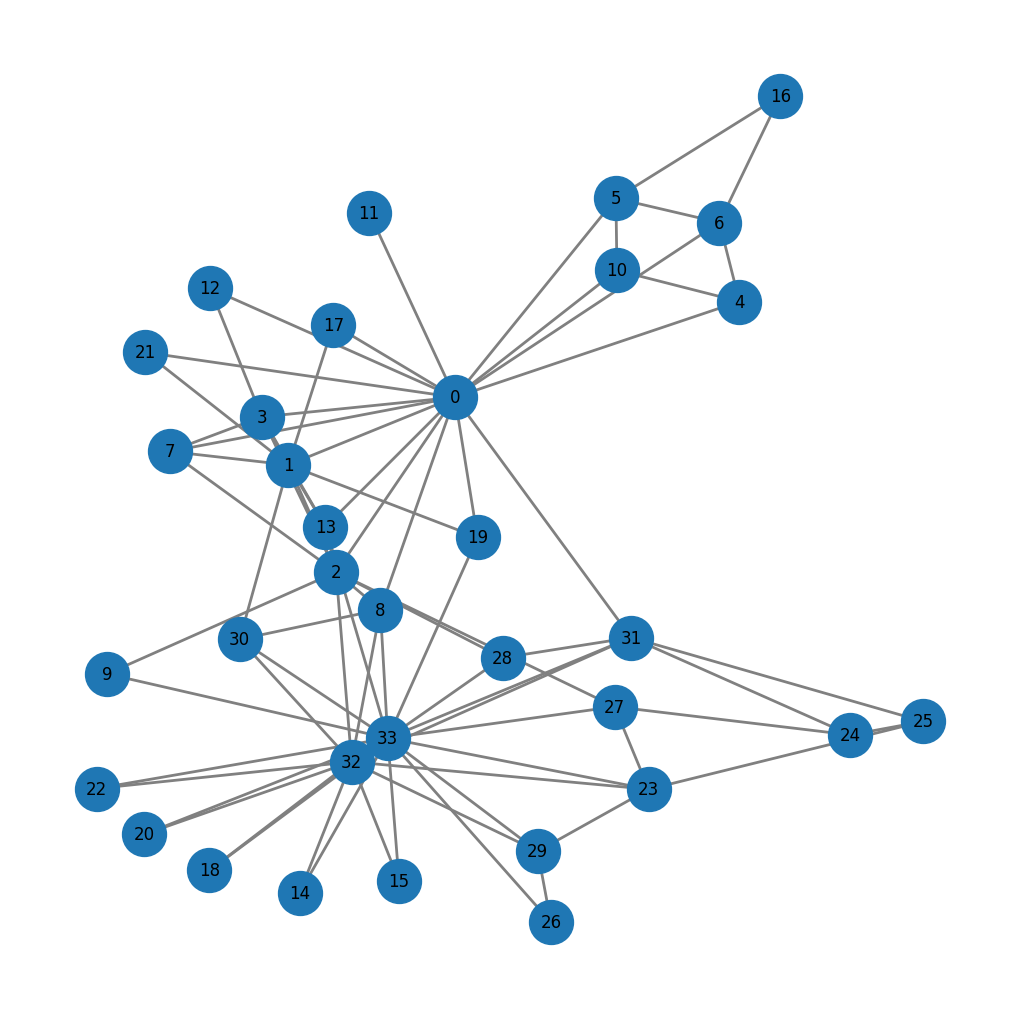

Here are the values of the metrics after split 0:

Metrics for Community 1 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]:
Degree centrality:
 [(0, 0.48484848484848486), (1, 0.2727272727272727), (2, 0.30303030303030304), (3, 0.18181818181818182), (4, 0.09090909090909091), (5, 0.12121212121212122), (6, 0.12121212121212122), (7, 0.12121212121212122), (8, 0.15151515151515152), (9, 0.06060606060606061), (10, 0.09090909090909091), (11, 0.030303030303030304), (12, 0.06060606060606061), (13, 0.15151515151515152), (14, 0.06060606060606061), (15, 0.06060606060606061), (16, 0.06060606060606061), (17, 0.06060606060606061), (18, 0.06060606060606061), (19, 0.09090909090909091), (20, 0.06060606060606061), (21, 0.06060606060606061), (22, 0.06060606060606061), (23, 0.15151515151515152), (24, 0.09090909090909091), (25, 0.09090909090909091), (26, 0.06060606060606061), (27, 0.12121212121212122), (28, 0.09090909090909091), (29

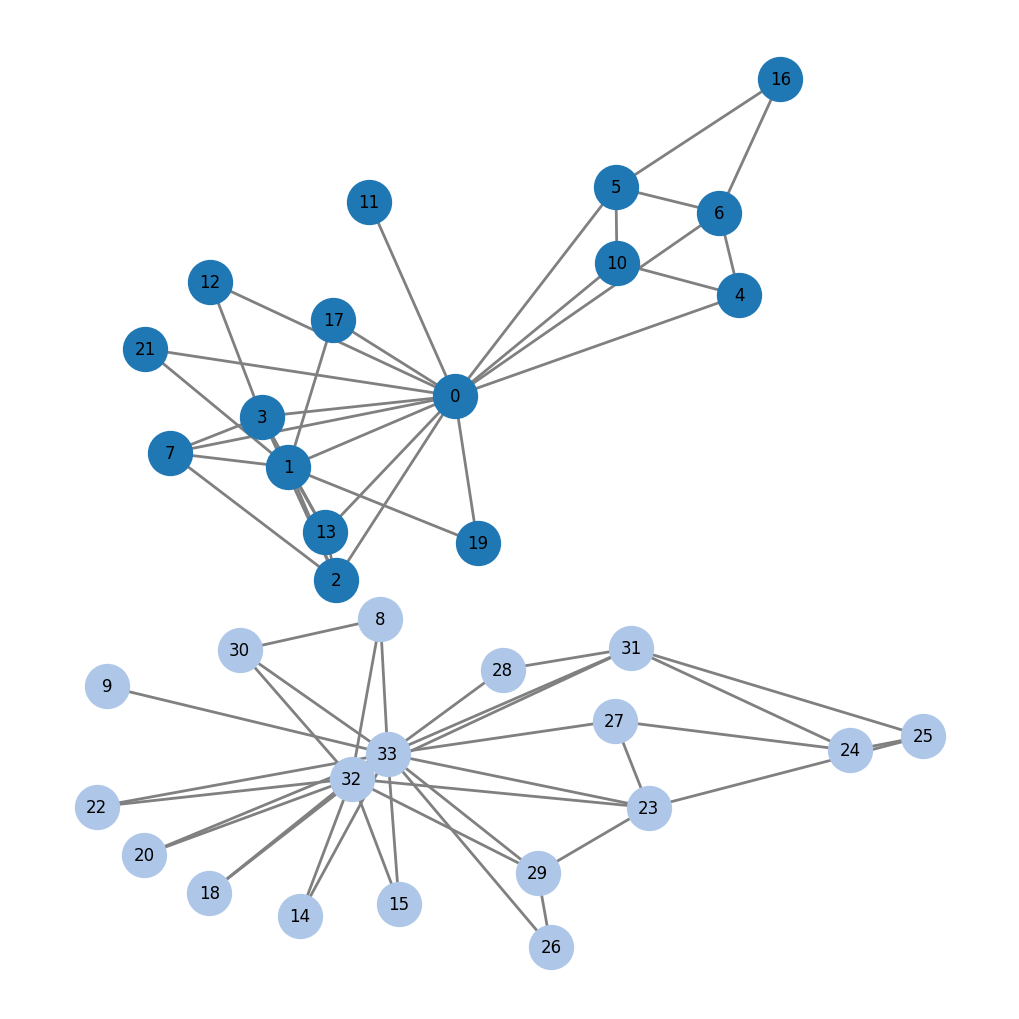

Here are the values of the metrics after split 1:

Metrics for Community 1 [0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21]:
Degree centrality:
 [(0, 0.9333333333333333), (1, 0.5333333333333333), (2, 0.3333333333333333), (3, 0.4), (4, 0.2), (5, 0.26666666666666666), (6, 0.26666666666666666), (7, 0.26666666666666666), (10, 0.2), (11, 0.06666666666666667), (12, 0.13333333333333333), (13, 0.26666666666666666), (16, 0.13333333333333333), (17, 0.13333333333333333), (19, 0.13333333333333333), (21, 0.13333333333333333)]
Betweenness centrality:
 [(0, 0.6896825396825397), (1, 0.07380952380952381), (2, 0.002380952380952381), (3, 0.02142857142857143), (4, 0.0031746031746031746), (5, 0.06507936507936508), (6, 0.06507936507936508), (7, 0.0), (10, 0.0031746031746031746), (11, 0.0), (12, 0.0), (13, 0.0), (16, 0.0), (17, 0.0), (19, 0.0), (21, 0.0)]
Closeness centrality:
 [(0, 0.9375), (1, 0.6521739130434783), (2, 0.5769230769230769), (3, 0.6), (4, 0.5555555555555556), (5, 0.5769230769230769), 

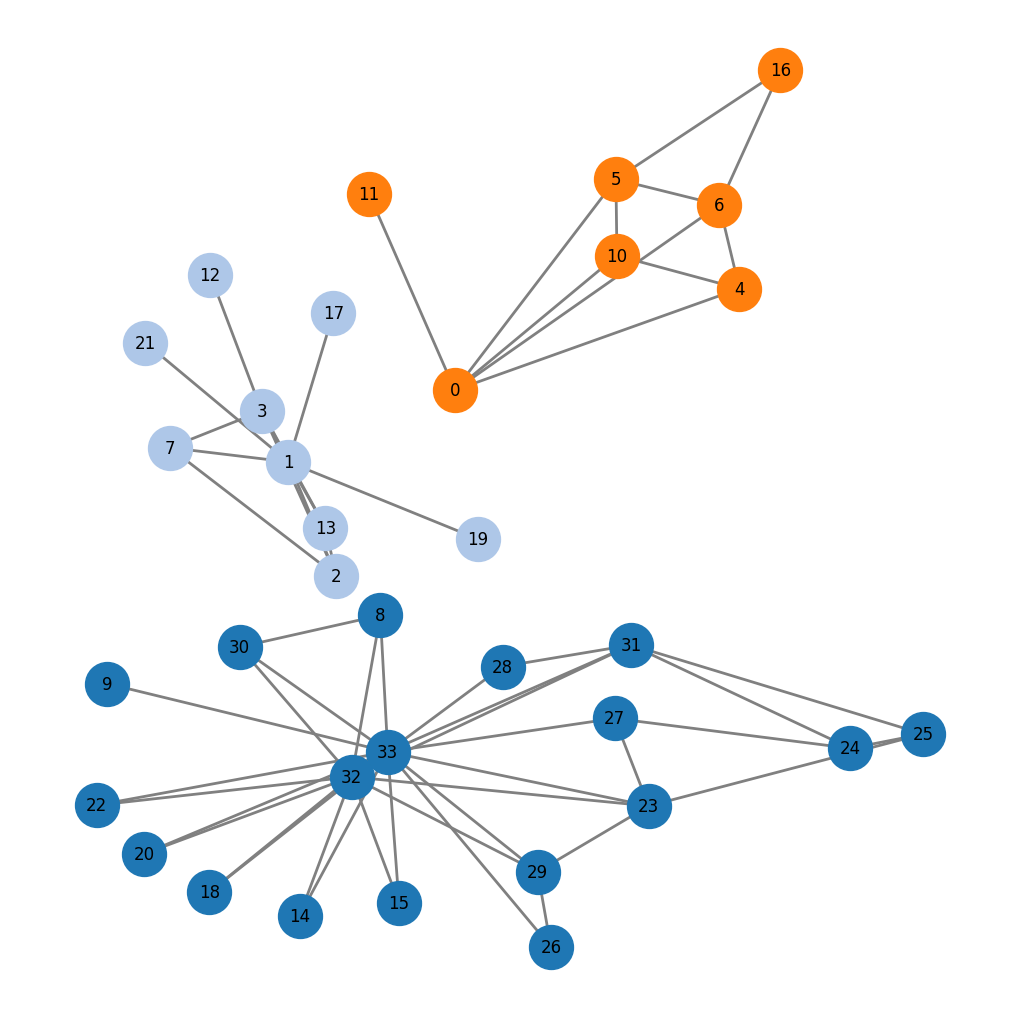

Here are the values of the metrics after split 2:

Metrics for Community 1 [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]:
Degree centrality:
 [(8, 0.1764705882352941), (9, 0.058823529411764705), (14, 0.11764705882352941), (15, 0.11764705882352941), (18, 0.11764705882352941), (20, 0.11764705882352941), (22, 0.11764705882352941), (23, 0.29411764705882354), (24, 0.1764705882352941), (25, 0.1764705882352941), (26, 0.11764705882352941), (27, 0.1764705882352941), (28, 0.11764705882352941), (29, 0.23529411764705882), (30, 0.1764705882352941), (31, 0.29411764705882354), (32, 0.6470588235294118), (33, 0.8823529411764706)]
Betweenness centrality:
 [(8, 0.0), (9, 0.0), (14, 0.0), (15, 0.0), (18, 0.0), (20, 0.0), (22, 0.0), (23, 0.06299019607843137), (24, 0.007352941176470588), (25, 0.0075980392156862735), (26, 0.0), (27, 0.03480392156862746), (28, 0.0), (29, 0.00980392156862745), (30, 0.0), (31, 0.11323529411764705), (32, 0.20122549019607844), (33, 0.5703431372549019)]
Cl

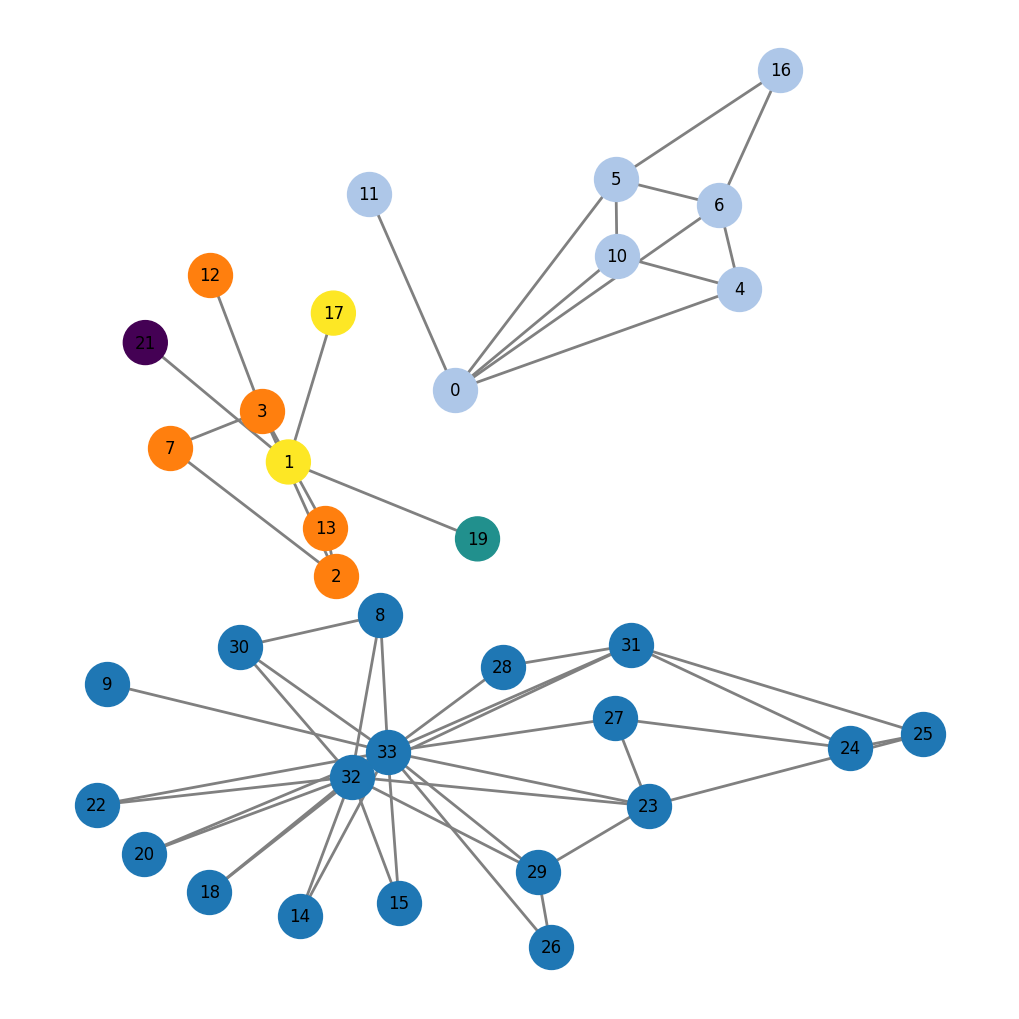

Here are the values of the metrics after split 3:

Metrics for Community 1 [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]:
Degree centrality:
 [(8, 0.1764705882352941), (9, 0.058823529411764705), (14, 0.11764705882352941), (15, 0.11764705882352941), (18, 0.11764705882352941), (20, 0.11764705882352941), (22, 0.11764705882352941), (23, 0.29411764705882354), (24, 0.1764705882352941), (25, 0.1764705882352941), (26, 0.11764705882352941), (27, 0.1764705882352941), (28, 0.11764705882352941), (29, 0.23529411764705882), (30, 0.1764705882352941), (31, 0.29411764705882354), (32, 0.6470588235294118), (33, 0.8823529411764706)]
Betweenness centrality:
 [(8, 0.0), (9, 0.0), (14, 0.0), (15, 0.0), (18, 0.0), (20, 0.0), (22, 0.0), (23, 0.06299019607843137), (24, 0.007352941176470588), (25, 0.0075980392156862735), (26, 0.0), (27, 0.03480392156862746), (28, 0.0), (29, 0.00980392156862745), (30, 0.0), (31, 0.11323529411764705), (32, 0.20122549019607844), (33, 0.5703431372549019)]
Cl

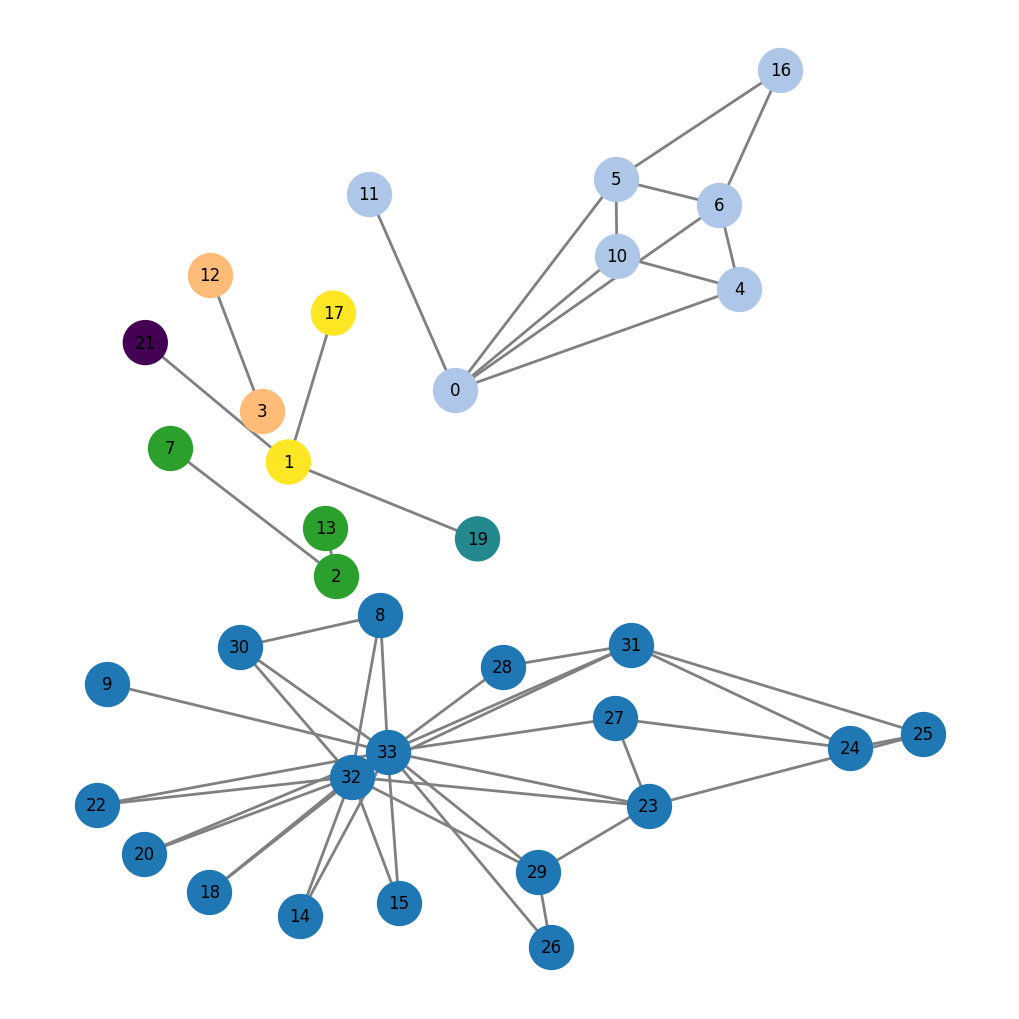

Here are the values of the metrics after split 4:

Metrics for Community 1 [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]:
Degree centrality:
 [(8, 0.1764705882352941), (9, 0.058823529411764705), (14, 0.11764705882352941), (15, 0.11764705882352941), (18, 0.11764705882352941), (20, 0.11764705882352941), (22, 0.11764705882352941), (23, 0.29411764705882354), (24, 0.1764705882352941), (25, 0.1764705882352941), (26, 0.11764705882352941), (27, 0.1764705882352941), (28, 0.11764705882352941), (29, 0.23529411764705882), (30, 0.1764705882352941), (31, 0.29411764705882354), (32, 0.6470588235294118), (33, 0.8823529411764706)]
Betweenness centrality:
 [(8, 0.0), (9, 0.0), (14, 0.0), (15, 0.0), (18, 0.0), (20, 0.0), (22, 0.0), (23, 0.06299019607843137), (24, 0.007352941176470588), (25, 0.0075980392156862735), (26, 0.0), (27, 0.03480392156862746), (28, 0.0), (29, 0.00980392156862745), (30, 0.0), (31, 0.11323529411764705), (32, 0.20122549019607844), (33, 0.5703431372549019)]
Cl

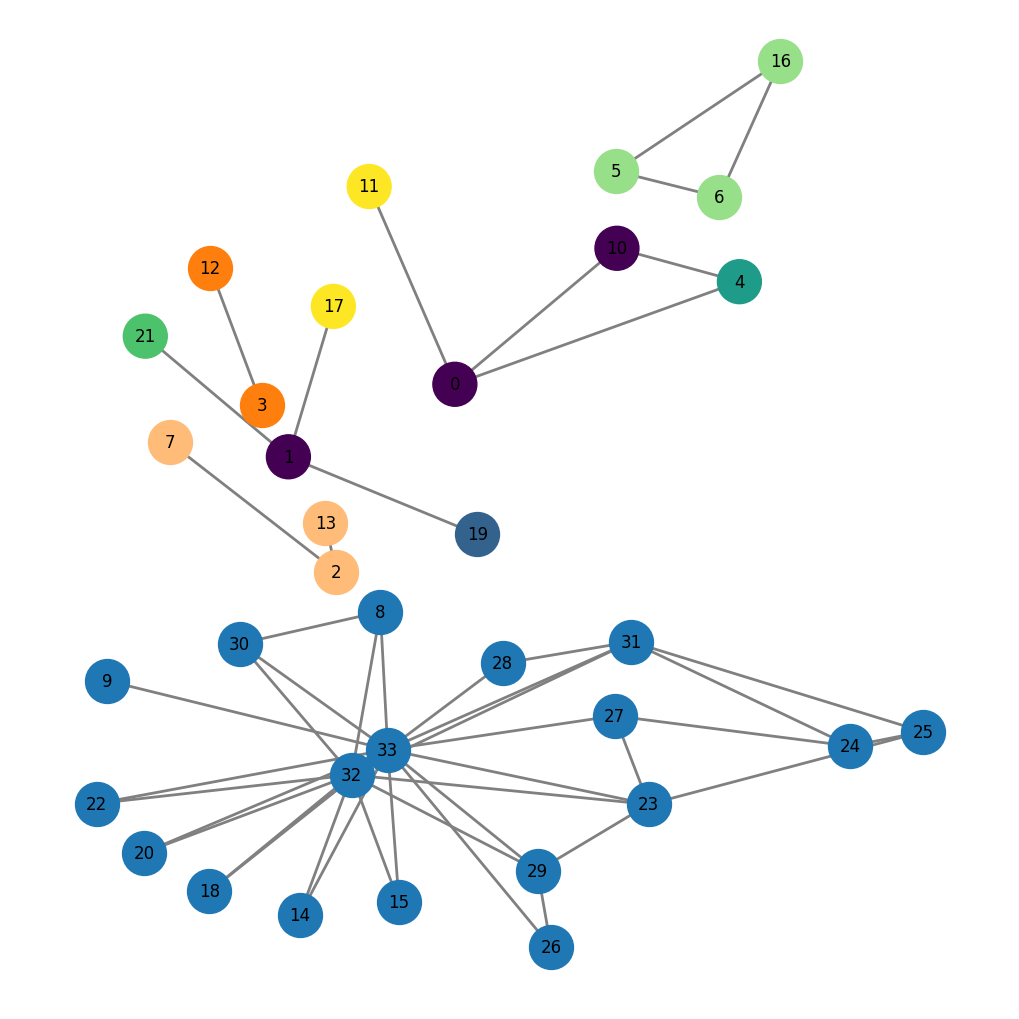

Here are the values of the metrics after split 5:

Metrics for Community 1 [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]:
Degree centrality:
 [(8, 0.1764705882352941), (9, 0.058823529411764705), (14, 0.11764705882352941), (15, 0.11764705882352941), (18, 0.11764705882352941), (20, 0.11764705882352941), (22, 0.11764705882352941), (23, 0.29411764705882354), (24, 0.1764705882352941), (25, 0.1764705882352941), (26, 0.11764705882352941), (27, 0.1764705882352941), (28, 0.11764705882352941), (29, 0.23529411764705882), (30, 0.1764705882352941), (31, 0.29411764705882354), (32, 0.6470588235294118), (33, 0.8823529411764706)]
Betweenness centrality:
 [(8, 0.0), (9, 0.0), (14, 0.0), (15, 0.0), (18, 0.0), (20, 0.0), (22, 0.0), (23, 0.06299019607843137), (24, 0.007352941176470588), (25, 0.0075980392156862735), (26, 0.0), (27, 0.03480392156862746), (28, 0.0), (29, 0.00980392156862745), (30, 0.0), (31, 0.11323529411764705), (32, 0.20122549019607844), (33, 0.5703431372549019)]
Cl

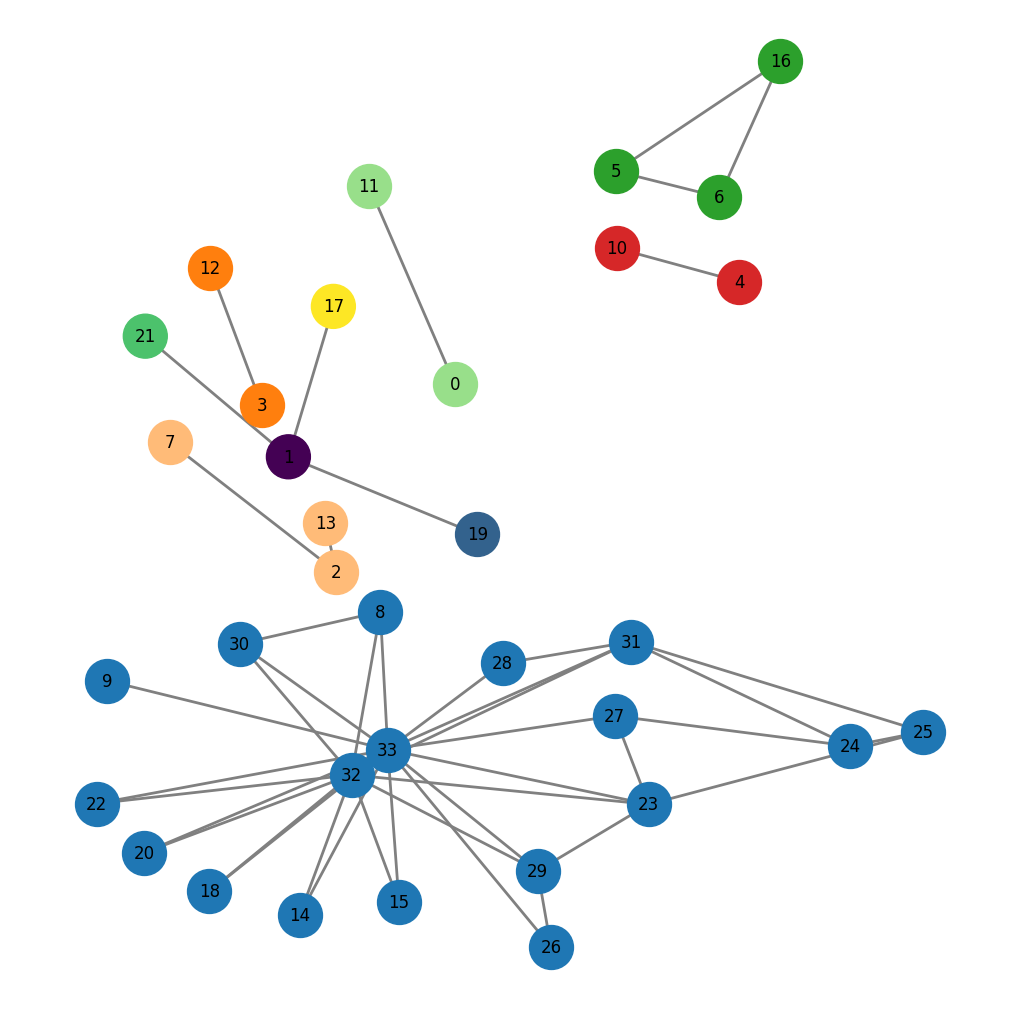

Here are the values of the metrics after split 6:

Metrics for Community 1 [8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]:
Degree centrality:
 [(8, 0.1764705882352941), (9, 0.058823529411764705), (14, 0.11764705882352941), (15, 0.11764705882352941), (18, 0.11764705882352941), (20, 0.11764705882352941), (22, 0.11764705882352941), (23, 0.29411764705882354), (24, 0.1764705882352941), (25, 0.1764705882352941), (26, 0.11764705882352941), (27, 0.1764705882352941), (28, 0.11764705882352941), (29, 0.23529411764705882), (30, 0.1764705882352941), (31, 0.29411764705882354), (32, 0.6470588235294118), (33, 0.8823529411764706)]
Betweenness centrality:
 [(8, 0.0), (9, 0.0), (14, 0.0), (15, 0.0), (18, 0.0), (20, 0.0), (22, 0.0), (23, 0.06299019607843137), (24, 0.007352941176470588), (25, 0.0075980392156862735), (26, 0.0), (27, 0.03480392156862746), (28, 0.0), (29, 0.00980392156862745), (30, 0.0), (31, 0.11323529411764705), (32, 0.20122549019607844), (33, 0.5703431372549019)]
Cl

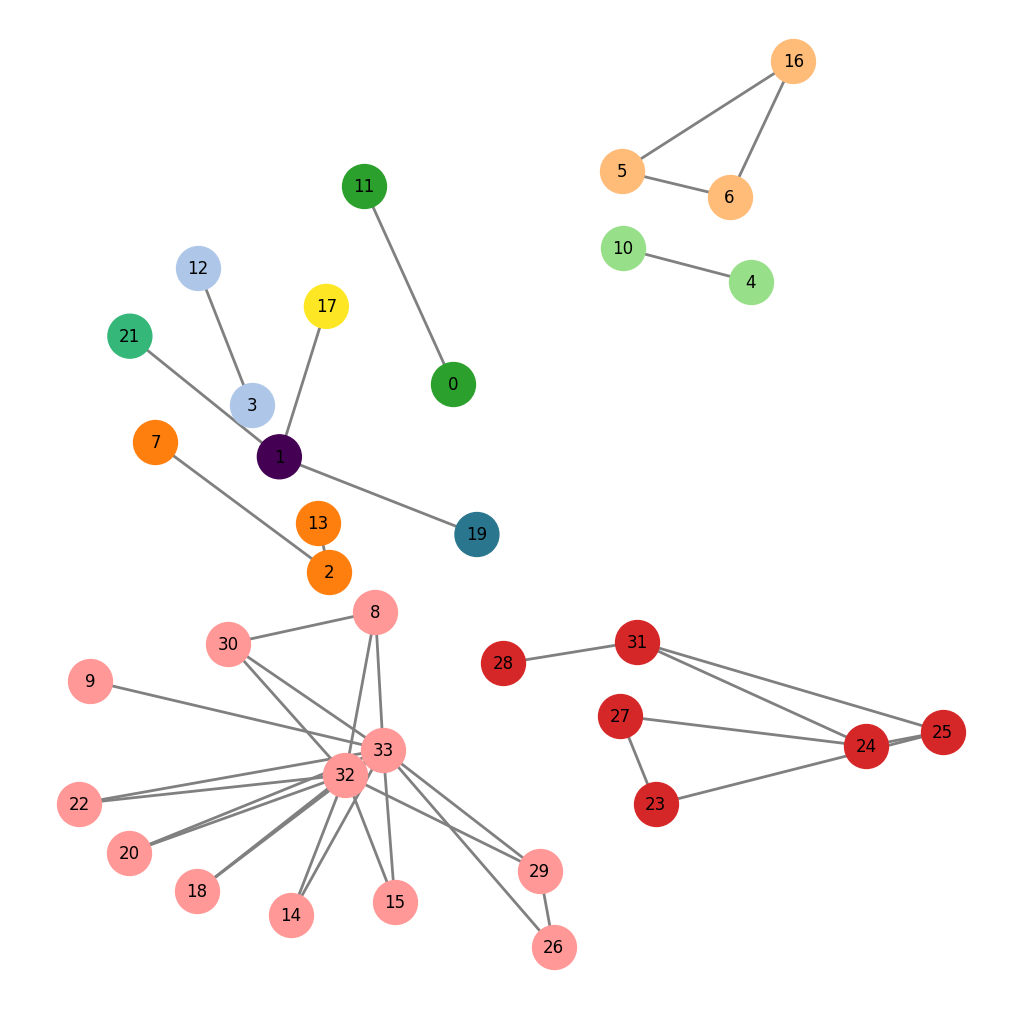

Here are the values of the metrics after split 7:

Metrics for Community 1 [1, 19, 21, 17]:
Degree centrality:
 [(1, 1.0), (17, 0.3333333333333333), (19, 0.3333333333333333), (21, 0.3333333333333333)]
Betweenness centrality:
 [(1, 1.0), (17, 0.0), (19, 0.0), (21, 0.0)]
Closeness centrality:
 [(1, 1.0), (17, 0.6), (19, 0.6), (21, 0.6)]
Clustering co-efficient:
 [(1, 0), (17, 0), (19, 0), (21, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 2 [3, 12]:
Degree centrality:
 [(3, 1.0), (12, 1.0)]
Betweenness centrality:
 [(3, 0.0), (12, 0.0)]
Closeness centrality:
 [(3, 1.0), (12, 1.0)]
Clustering co-efficient:
 [(3, 0), (12, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 3 [2, 7, 13]:
Degree centrality:
 [(2, 1.0), (7, 0.5), (13, 0.5)]
Betweenness centrality:
 [(2, 1.0), (7, 0.0), (13, 0.0)]
C

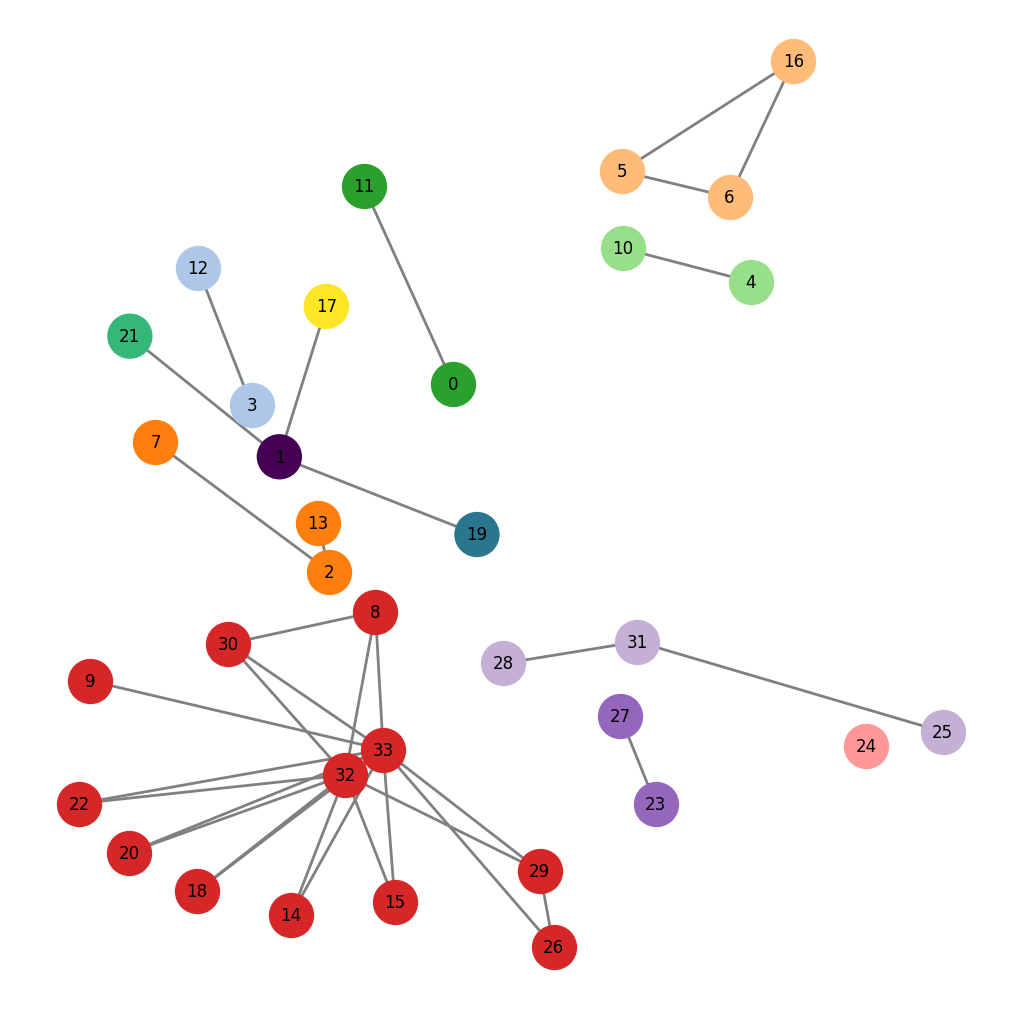

Here are the values of the metrics after split 8:

Metrics for Community 1 [1, 19, 21, 17]:
Degree centrality:
 [(1, 1.0), (17, 0.3333333333333333), (19, 0.3333333333333333), (21, 0.3333333333333333)]
Betweenness centrality:
 [(1, 1.0), (17, 0.0), (19, 0.0), (21, 0.0)]
Closeness centrality:
 [(1, 1.0), (17, 0.6), (19, 0.6), (21, 0.6)]
Clustering co-efficient:
 [(1, 0), (17, 0), (19, 0), (21, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 2 [3, 12]:
Degree centrality:
 [(3, 1.0), (12, 1.0)]
Betweenness centrality:
 [(3, 0.0), (12, 0.0)]
Closeness centrality:
 [(3, 1.0), (12, 1.0)]
Clustering co-efficient:
 [(3, 0), (12, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 3 [2, 7, 13]:
Degree centrality:
 [(2, 1.0), (7, 0.5), (13, 0.5)]
Betweenness centrality:
 [(2, 1.0), (7, 0.0), (13, 0.0)]
C

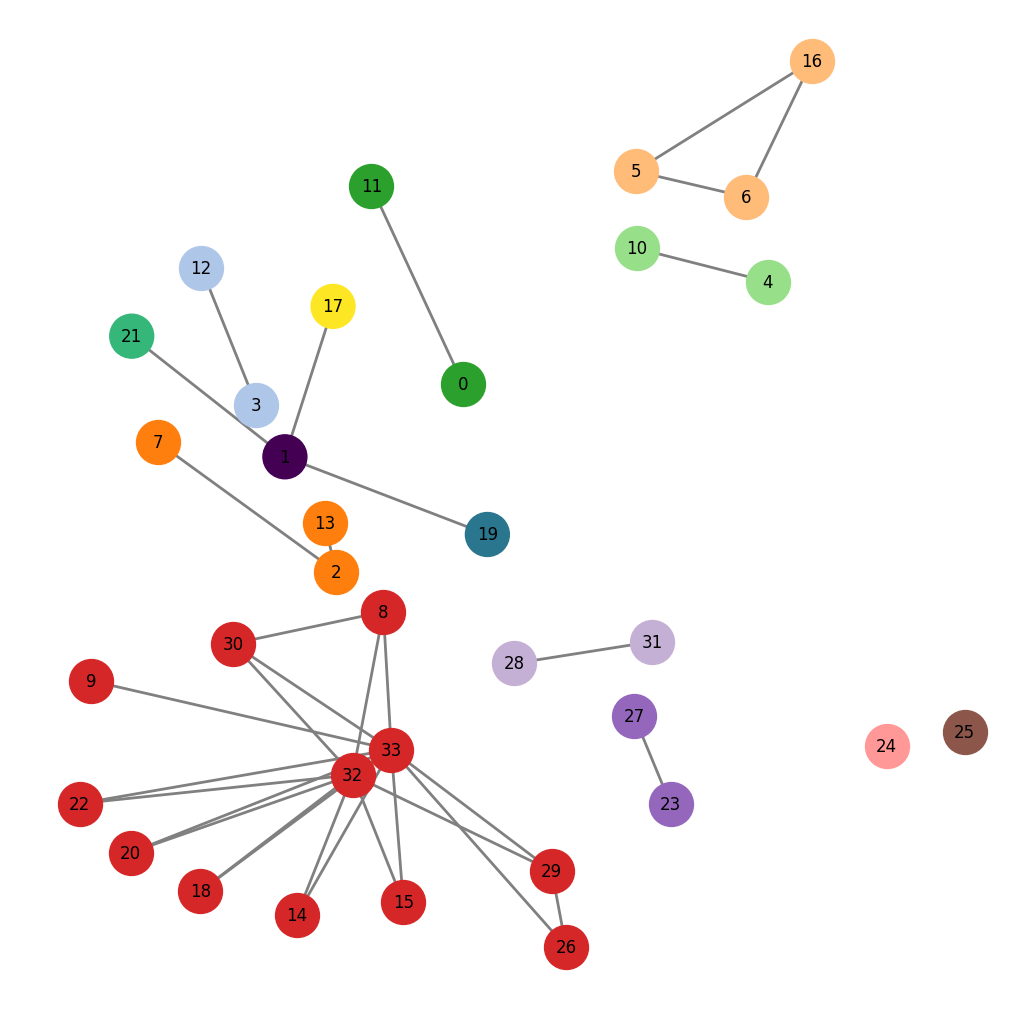

Here are the values of the metrics after split 9:

Metrics for Community 1 [1, 19, 21, 17]:
Degree centrality:
 [(1, 1.0), (17, 0.3333333333333333), (19, 0.3333333333333333), (21, 0.3333333333333333)]
Betweenness centrality:
 [(1, 1.0), (17, 0.0), (19, 0.0), (21, 0.0)]
Closeness centrality:
 [(1, 1.0), (17, 0.6), (19, 0.6), (21, 0.6)]
Clustering co-efficient:
 [(1, 0), (17, 0), (19, 0), (21, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 2 [3, 12]:
Degree centrality:
 [(3, 1.0), (12, 1.0)]
Betweenness centrality:
 [(3, 0.0), (12, 0.0)]
Closeness centrality:
 [(3, 1.0), (12, 1.0)]
Clustering co-efficient:
 [(3, 0), (12, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 3 [2, 7, 13]:
Degree centrality:
 [(2, 1.0), (7, 0.5), (13, 0.5)]
Betweenness centrality:
 [(2, 1.0), (7, 0.0), (13, 0.0)]
C

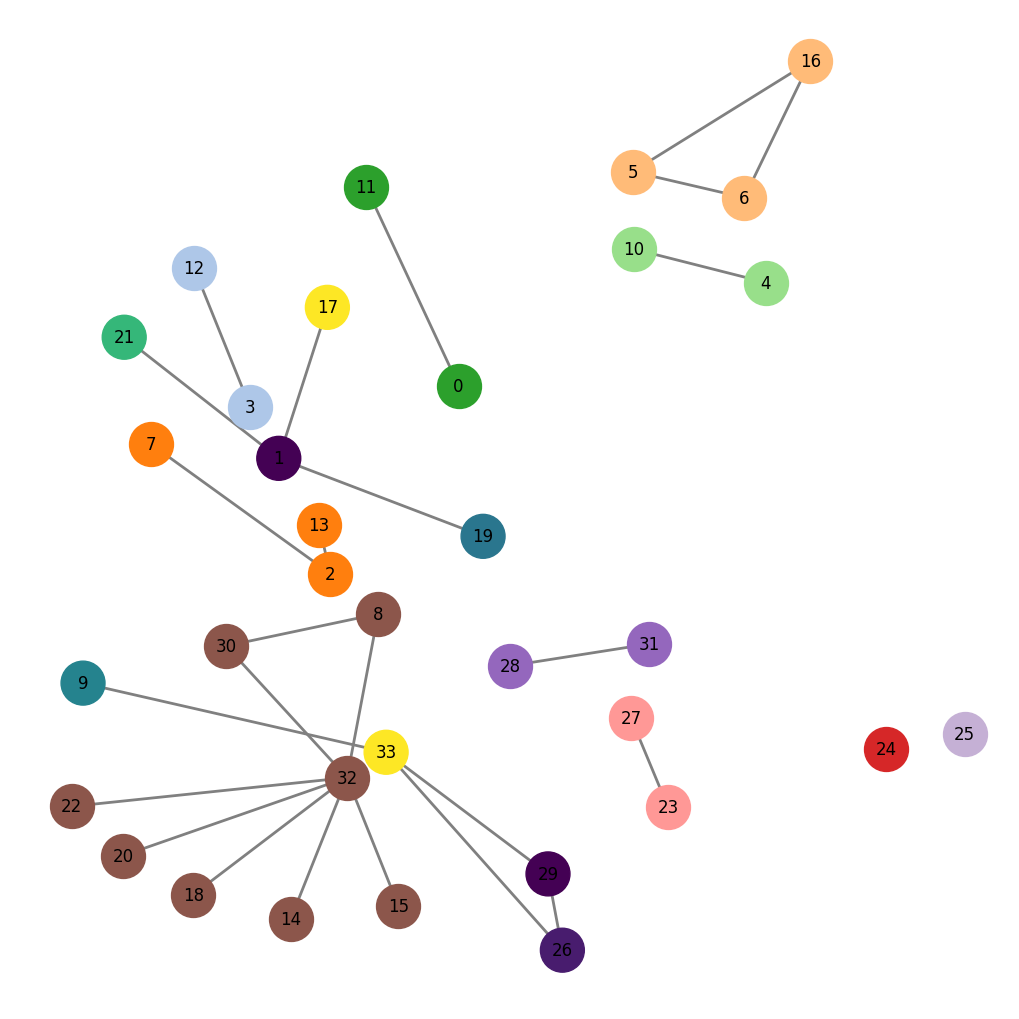

Here are the values of the metrics after split 10:

Metrics for Community 1 [1, 19, 21, 17]:
Degree centrality:
 [(1, 1.0), (17, 0.3333333333333333), (19, 0.3333333333333333), (21, 0.3333333333333333)]
Betweenness centrality:
 [(1, 1.0), (17, 0.0), (19, 0.0), (21, 0.0)]
Closeness centrality:
 [(1, 1.0), (17, 0.6), (19, 0.6), (21, 0.6)]
Clustering co-efficient:
 [(1, 0), (17, 0), (19, 0), (21, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 2 [3, 12]:
Degree centrality:
 [(3, 1.0), (12, 1.0)]
Betweenness centrality:
 [(3, 0.0), (12, 0.0)]
Closeness centrality:
 [(3, 1.0), (12, 1.0)]
Clustering co-efficient:
 [(3, 0), (12, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 3 [2, 7, 13]:
Degree centrality:
 [(2, 1.0), (7, 0.5), (13, 0.5)]
Betweenness centrality:
 [(2, 1.0), (7, 0.0), (13, 0.0)]


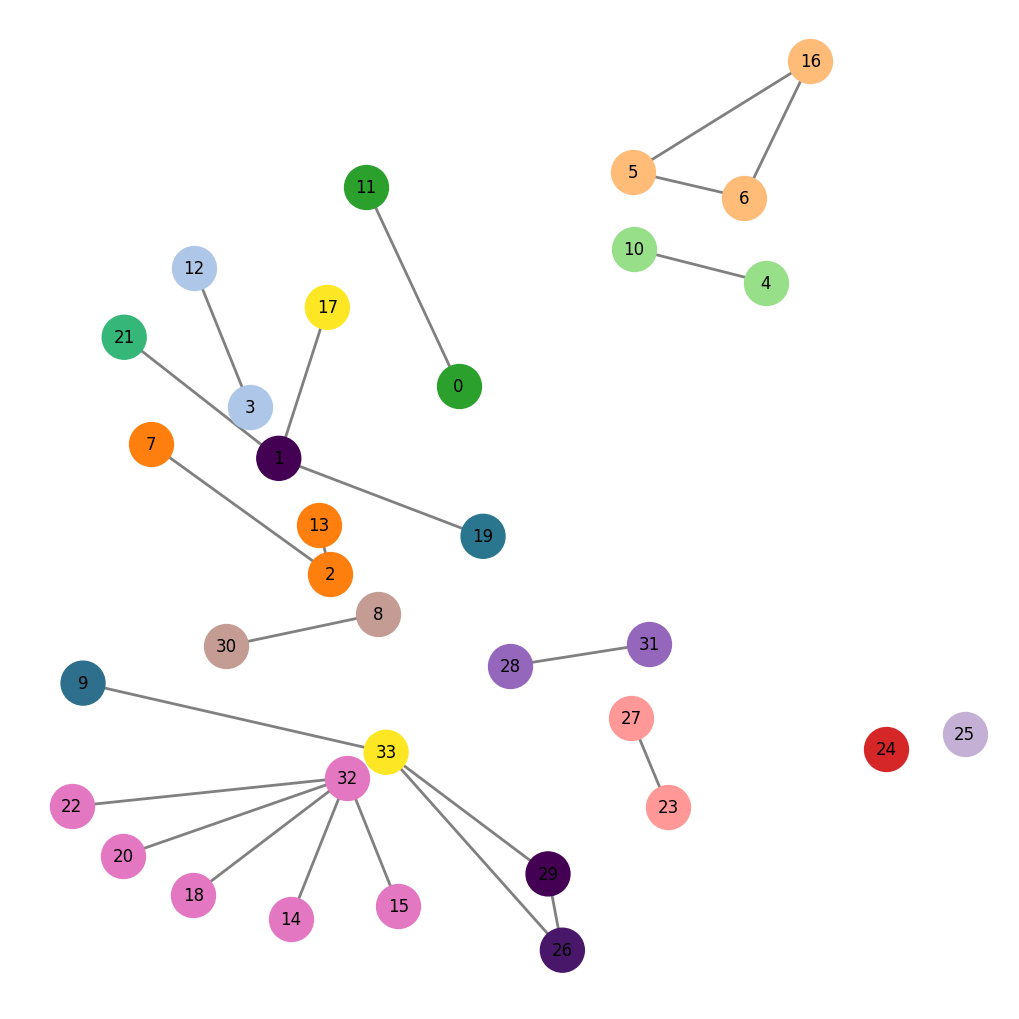

Here are the values of the metrics after split 11:

Metrics for Community 1 [1, 19, 21, 17]:
Degree centrality:
 [(1, 1.0), (17, 0.3333333333333333), (19, 0.3333333333333333), (21, 0.3333333333333333)]
Betweenness centrality:
 [(1, 1.0), (17, 0.0), (19, 0.0), (21, 0.0)]
Closeness centrality:
 [(1, 1.0), (17, 0.6), (19, 0.6), (21, 0.6)]
Clustering co-efficient:
 [(1, 0), (17, 0), (19, 0), (21, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 2 [3, 12]:
Degree centrality:
 [(3, 1.0), (12, 1.0)]
Betweenness centrality:
 [(3, 0.0), (12, 0.0)]
Closeness centrality:
 [(3, 1.0), (12, 1.0)]
Clustering co-efficient:
 [(3, 0), (12, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 3 [2, 7, 13]:
Degree centrality:
 [(2, 1.0), (7, 0.5), (13, 0.5)]
Betweenness centrality:
 [(2, 1.0), (7, 0.0), (13, 0.0)]


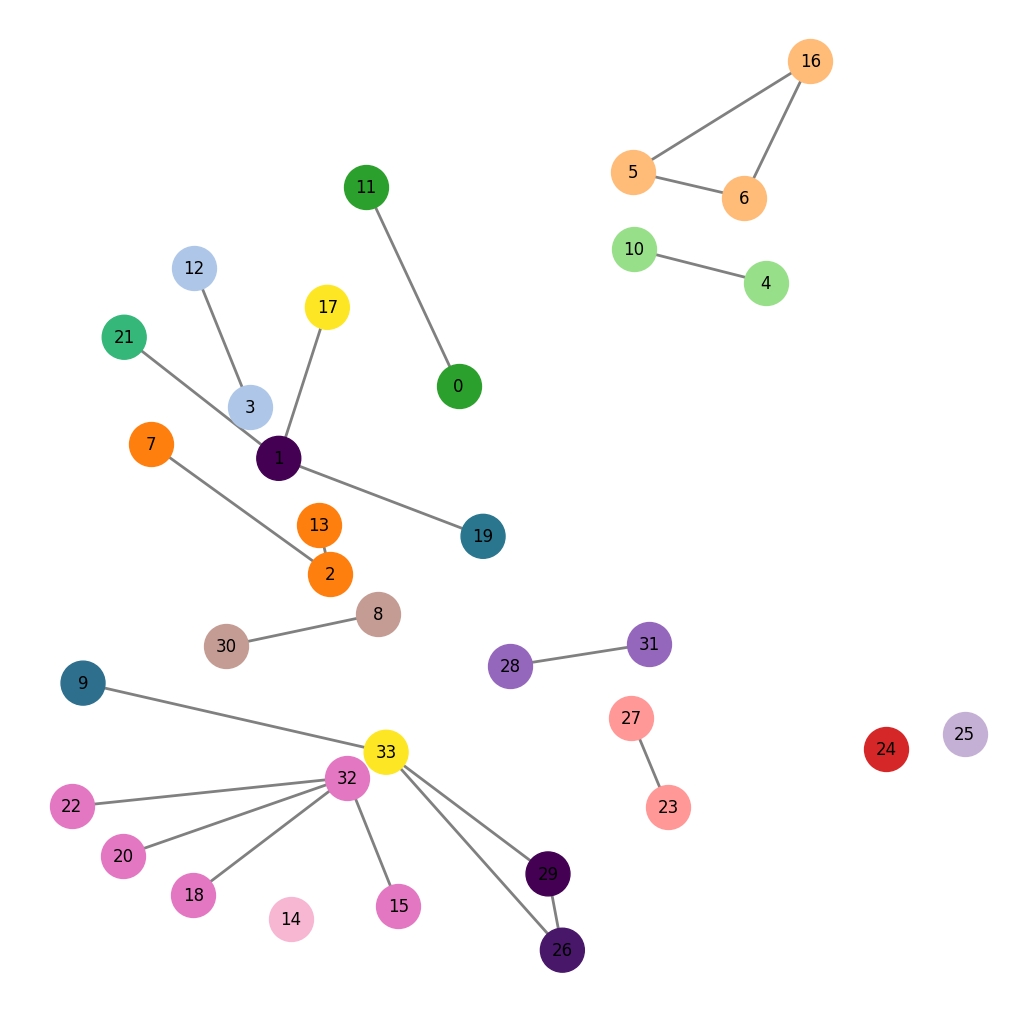

Here are the values of the metrics after split 12:

Metrics for Community 1 [1, 19, 21, 17]:
Degree centrality:
 [(1, 1.0), (17, 0.3333333333333333), (19, 0.3333333333333333), (21, 0.3333333333333333)]
Betweenness centrality:
 [(1, 1.0), (17, 0.0), (19, 0.0), (21, 0.0)]
Closeness centrality:
 [(1, 1.0), (17, 0.6), (19, 0.6), (21, 0.6)]
Clustering co-efficient:
 [(1, 0), (17, 0), (19, 0), (21, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 2 [3, 12]:
Degree centrality:
 [(3, 1.0), (12, 1.0)]
Betweenness centrality:
 [(3, 0.0), (12, 0.0)]
Closeness centrality:
 [(3, 1.0), (12, 1.0)]
Clustering co-efficient:
 [(3, 0), (12, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 3 [2, 7, 13]:
Degree centrality:
 [(2, 1.0), (7, 0.5), (13, 0.5)]
Betweenness centrality:
 [(2, 1.0), (7, 0.0), (13, 0.0)]


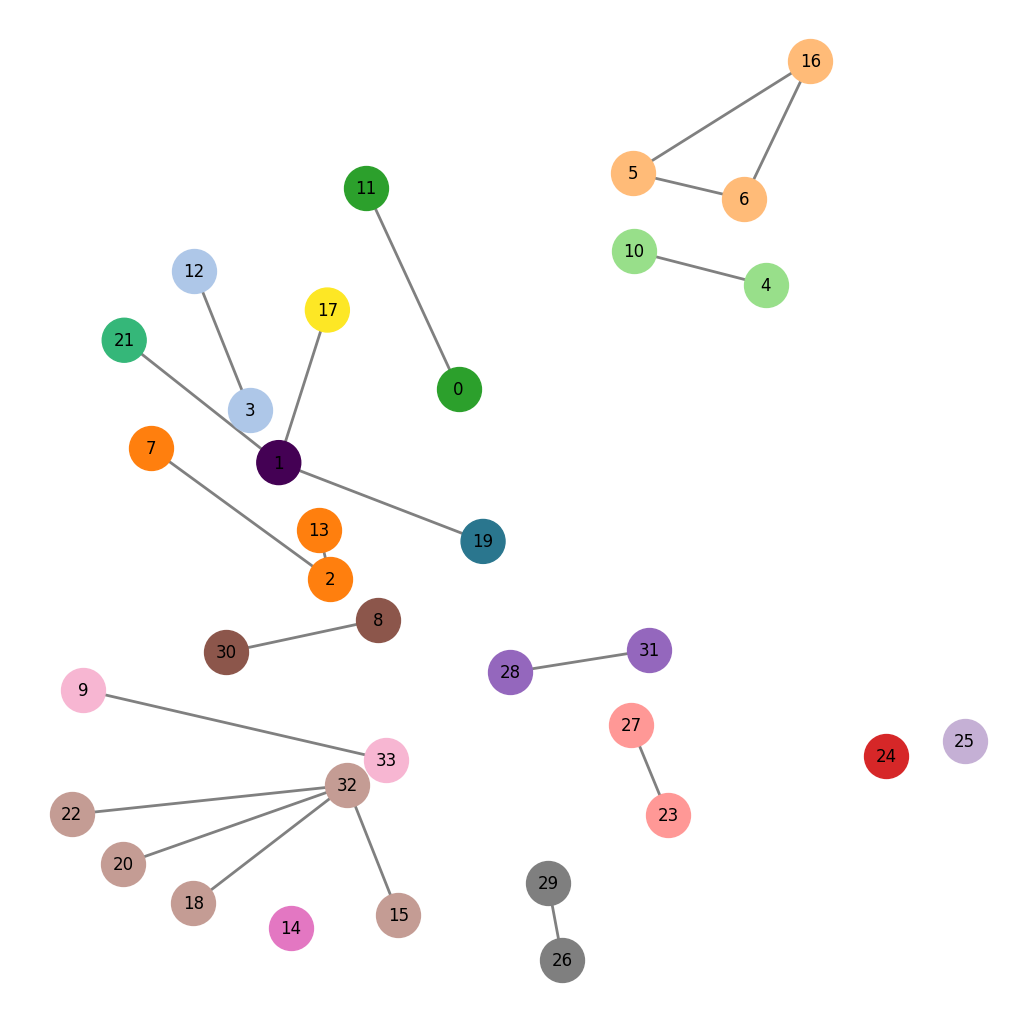

Here are the values of the metrics after split 13:

Metrics for Community 1 [1, 19, 21, 17]:
Degree centrality:
 [(1, 1.0), (17, 0.3333333333333333), (19, 0.3333333333333333), (21, 0.3333333333333333)]
Betweenness centrality:
 [(1, 1.0), (17, 0.0), (19, 0.0), (21, 0.0)]
Closeness centrality:
 [(1, 1.0), (17, 0.6), (19, 0.6), (21, 0.6)]
Clustering co-efficient:
 [(1, 0), (17, 0), (19, 0), (21, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 2 [3, 12]:
Degree centrality:
 [(3, 1.0), (12, 1.0)]
Betweenness centrality:
 [(3, 0.0), (12, 0.0)]
Closeness centrality:
 [(3, 1.0), (12, 1.0)]
Clustering co-efficient:
 [(3, 0), (12, 0)]
------------------------------------------------------------------------------------------------------------------------

Metrics for Community 3 [2, 7, 13]:
Degree centrality:
 [(2, 1.0), (7, 0.5), (13, 0.5)]
Betweenness centrality:
 [(2, 1.0), (7, 0.0), (13, 0.0)]


14

In [117]:
G_w=net.karate_club_graph()
G=net.Graph()
G.add_nodes_from(G_w.nodes())
G.add_edges_from(G_w.edges())
communities=[G]
metric_history = {'degree': {}, 'betweenness': {}, 'closeness': {}, 'clustering': {}}
for node in G.nodes():
    metric_history['degree'][node] = {}
    metric_history['betweenness'][node] = {}
    metric_history['closeness'][node] = {}
    metric_history['clustering'][node] = {}
plot_metrics(communities,0,metric_history)
modularity(G,communities,1,metric_history)

In [118]:
print("\n--- FINAL COMMUNITIES LIST ---")
for i, g in enumerate(communities):
    print(f"Community {i+1}: {list(g.nodes())}")


--- FINAL COMMUNITIES LIST ---
Community 1: [1, 19, 21, 17]
Community 2: [3, 12]
Community 3: [2, 7, 13]
Community 4: [16, 5, 6]
Community 5: [0, 11]
Community 6: [4, 10]
Community 7: [24]
Community 8: [27, 23]
Community 9: [28, 31]
Community 10: [25]
Community 11: [8, 30]
Community 12: [15, 18, 20, 22, 32]
Community 13: [14]
Community 14: [9, 33]
Community 15: [26, 29]


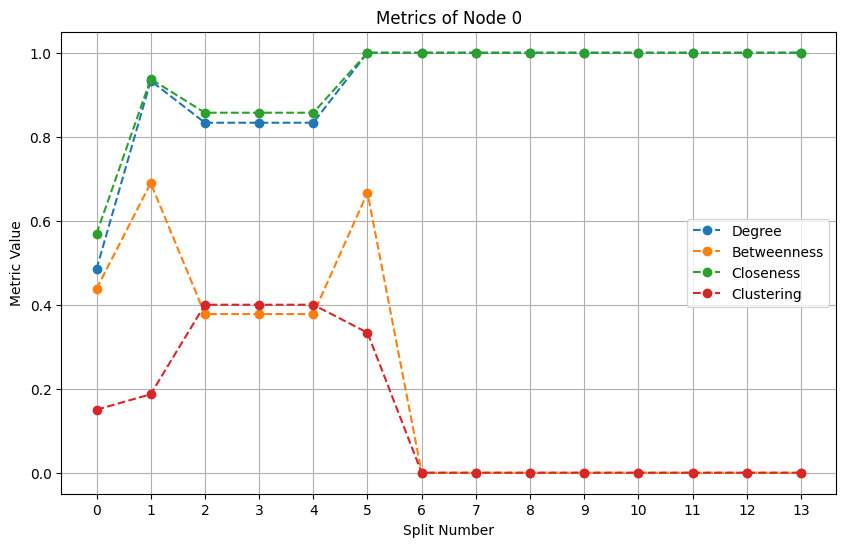

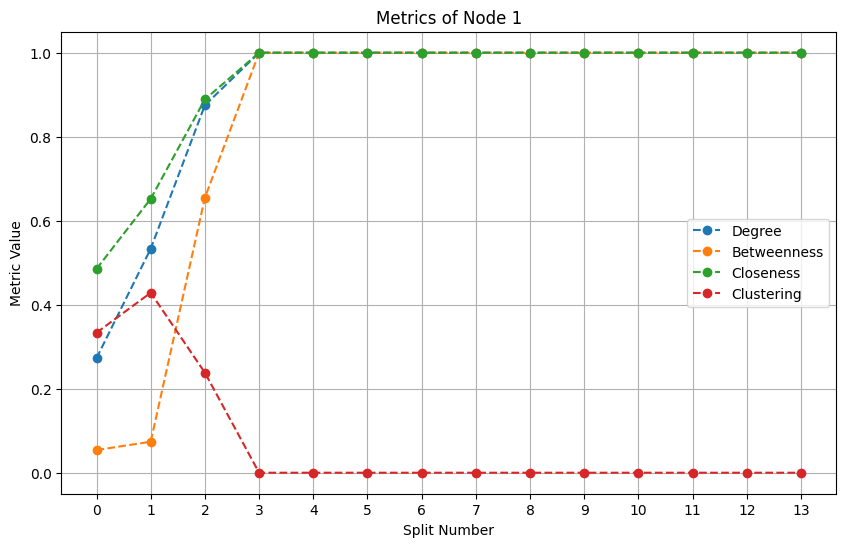

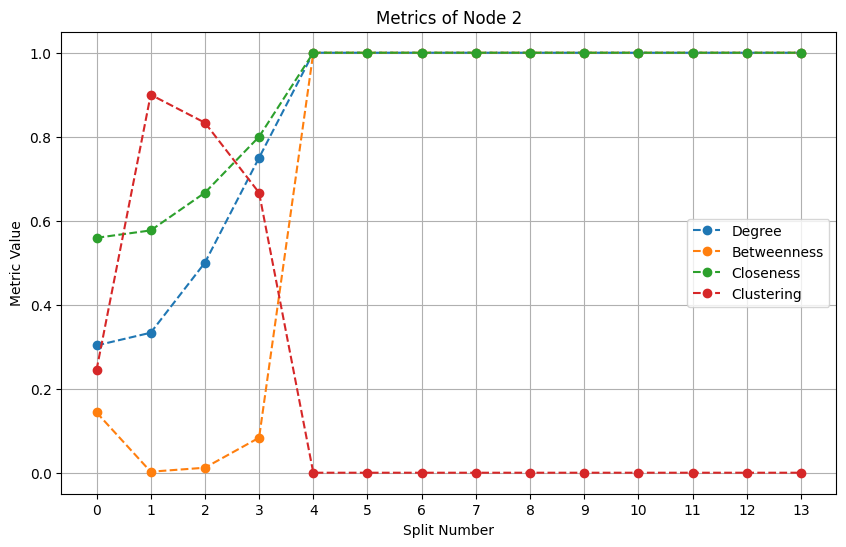

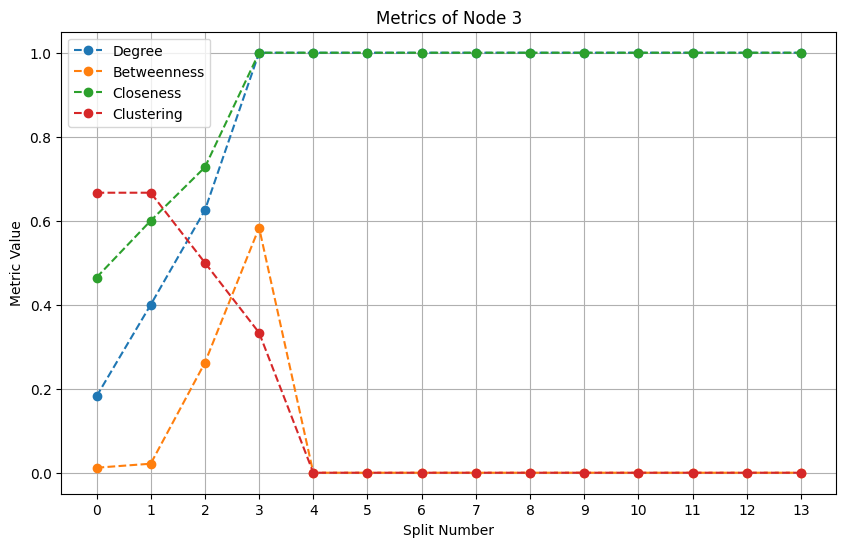

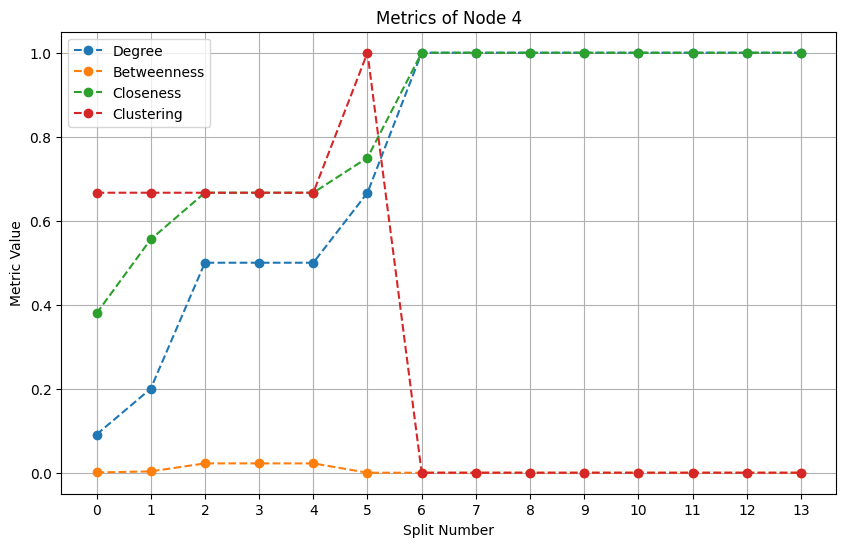

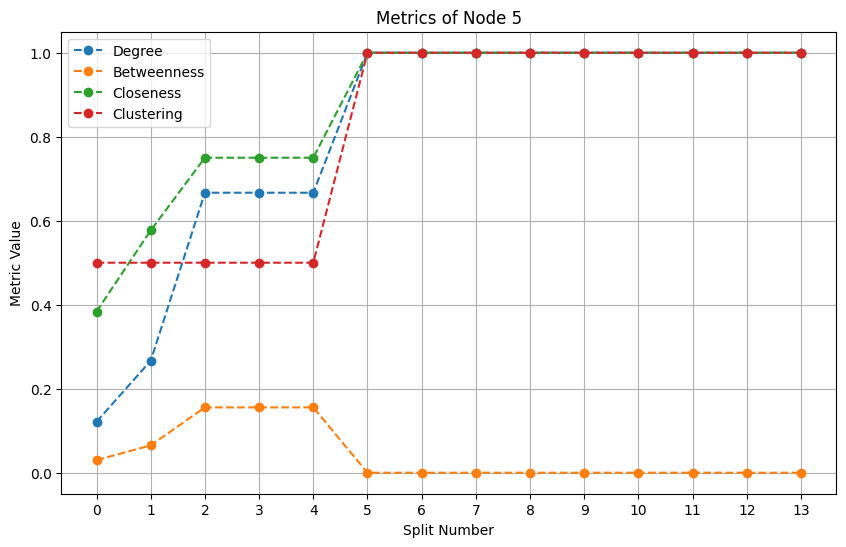

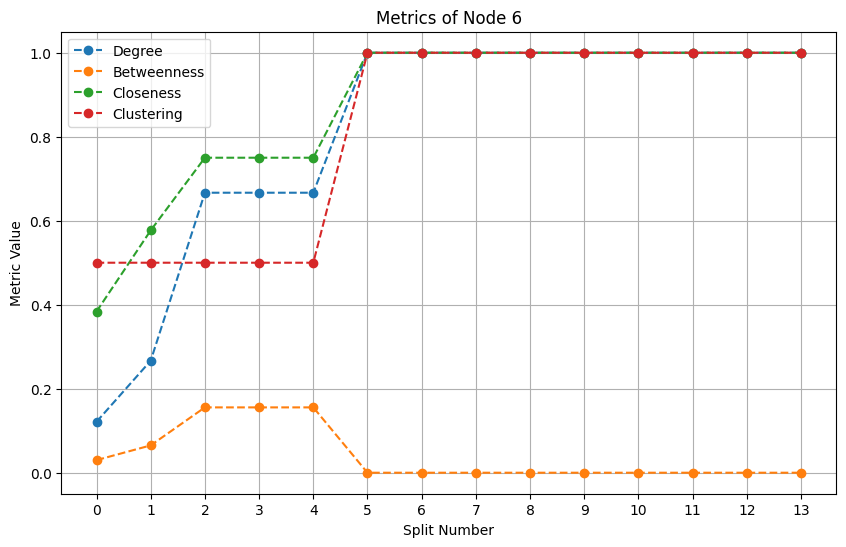

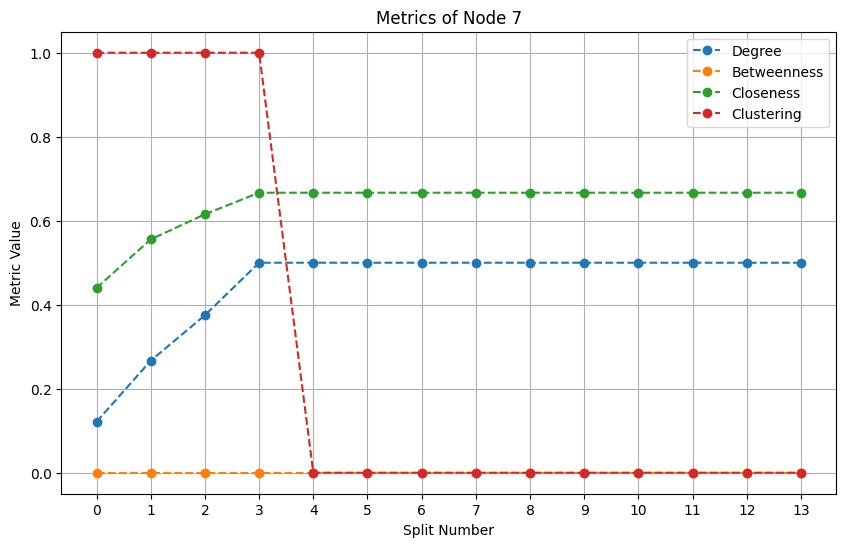

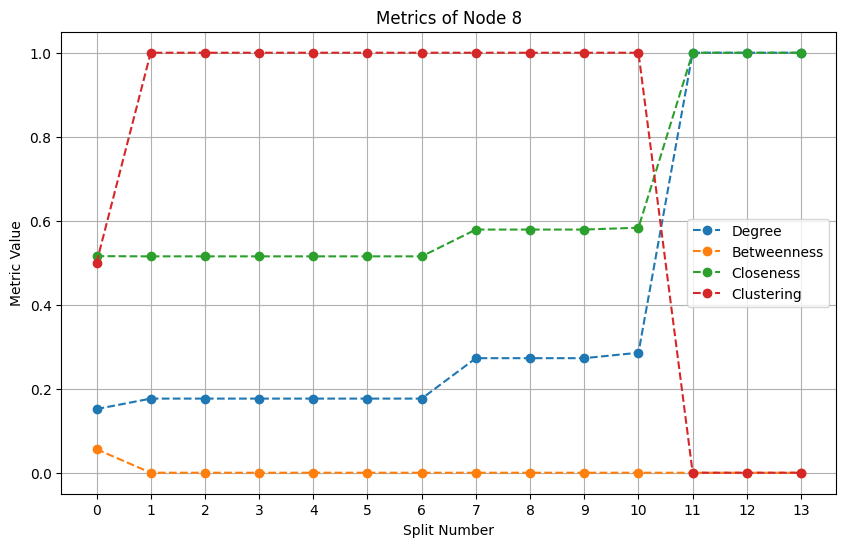

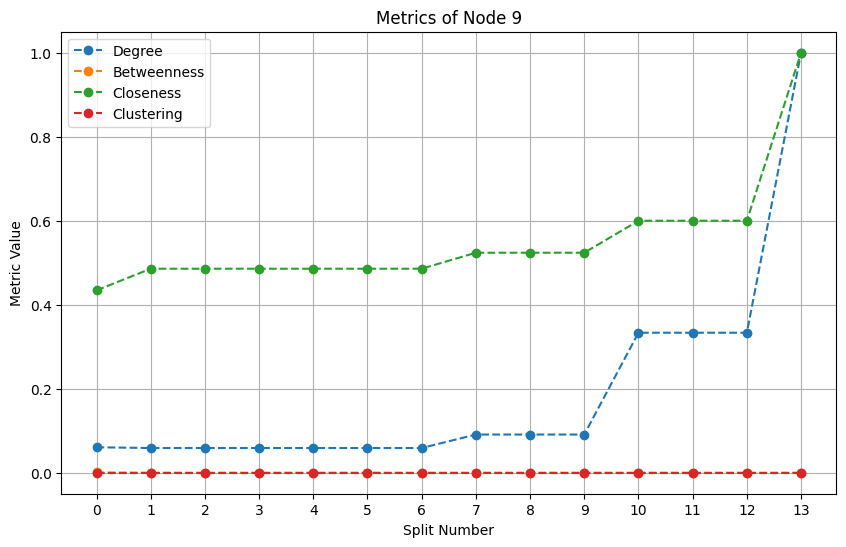

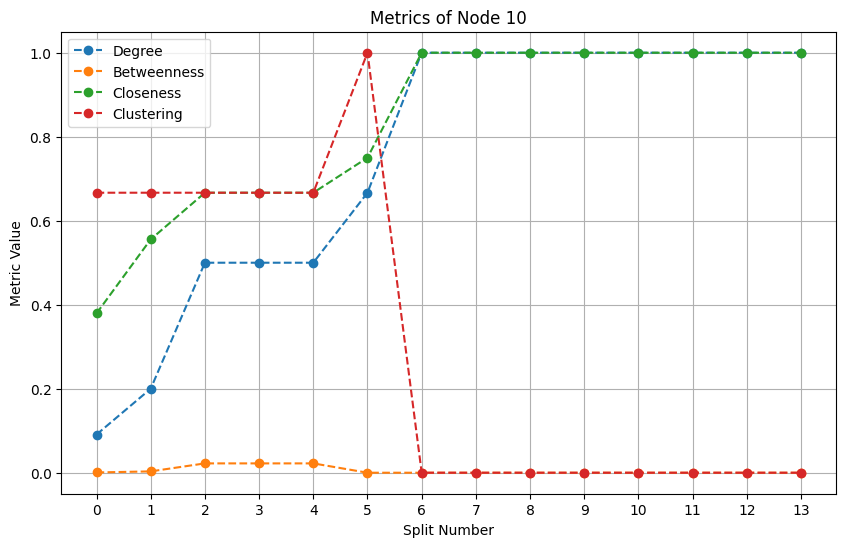

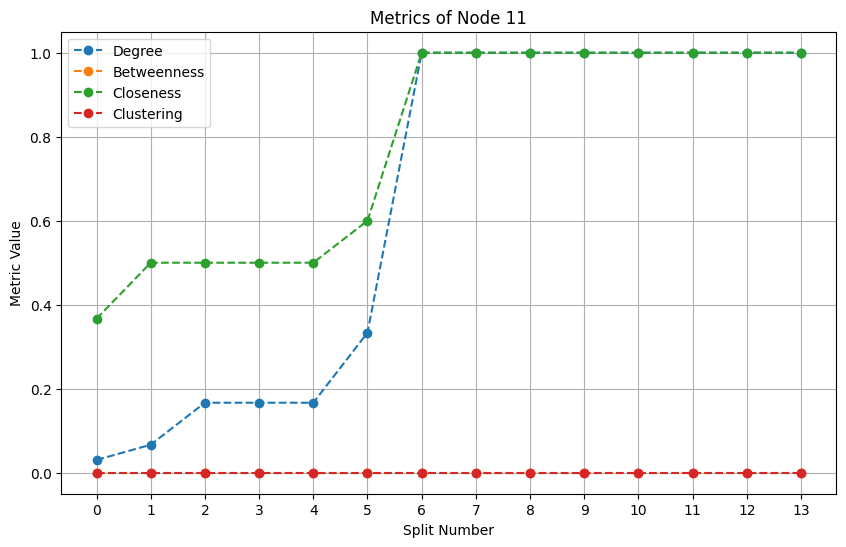

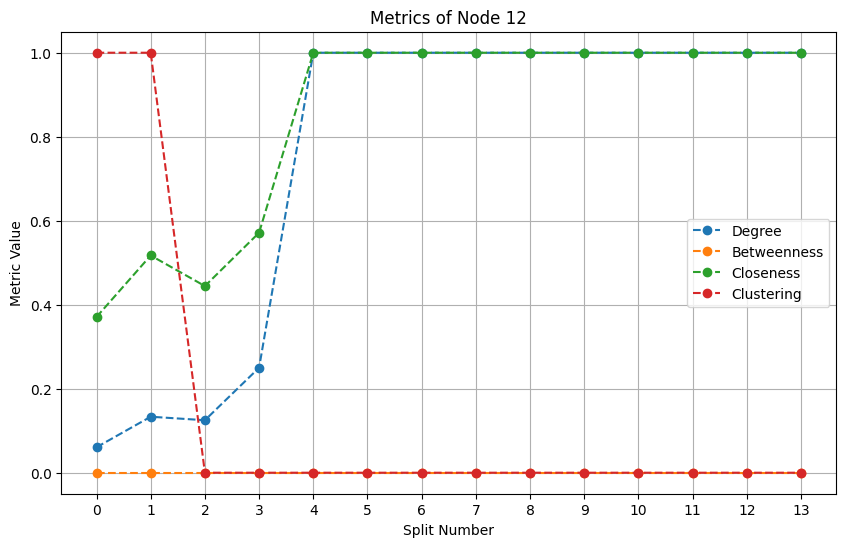

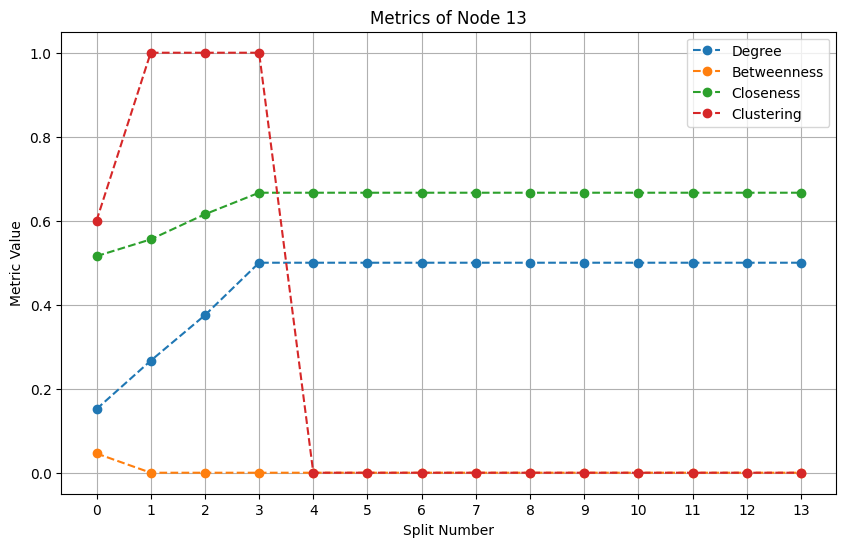

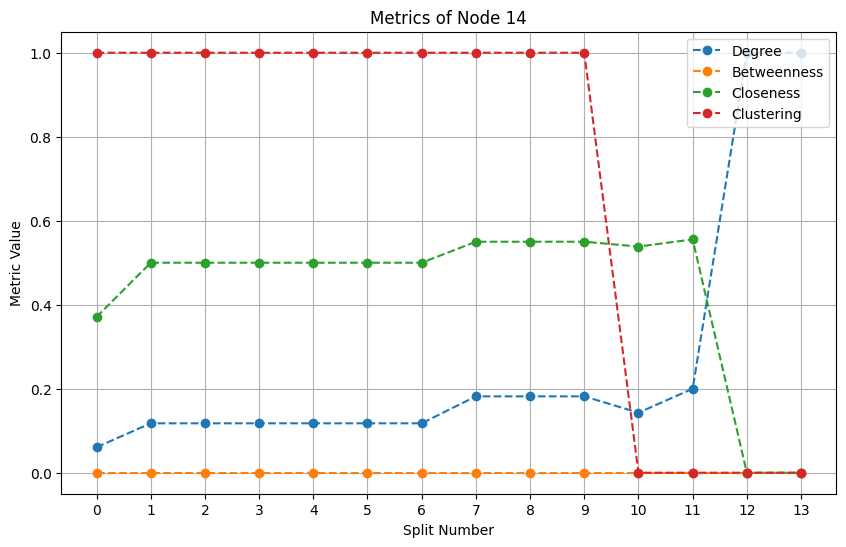

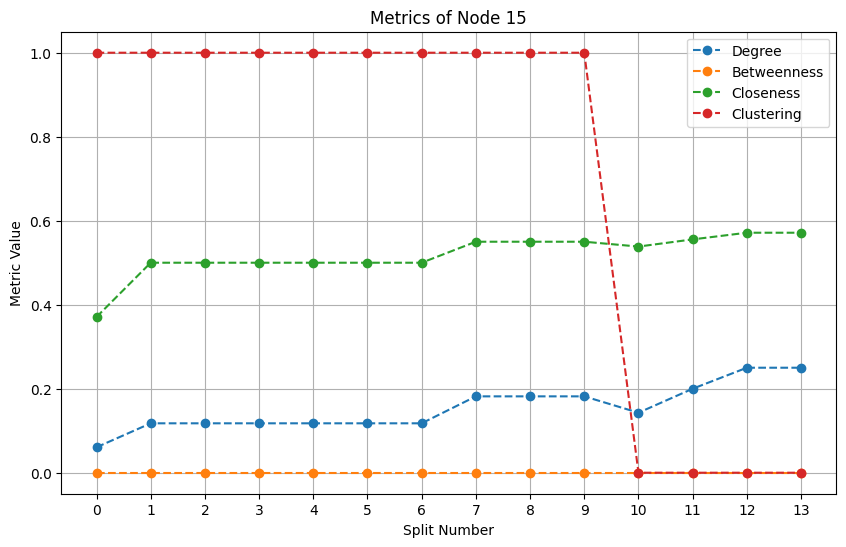

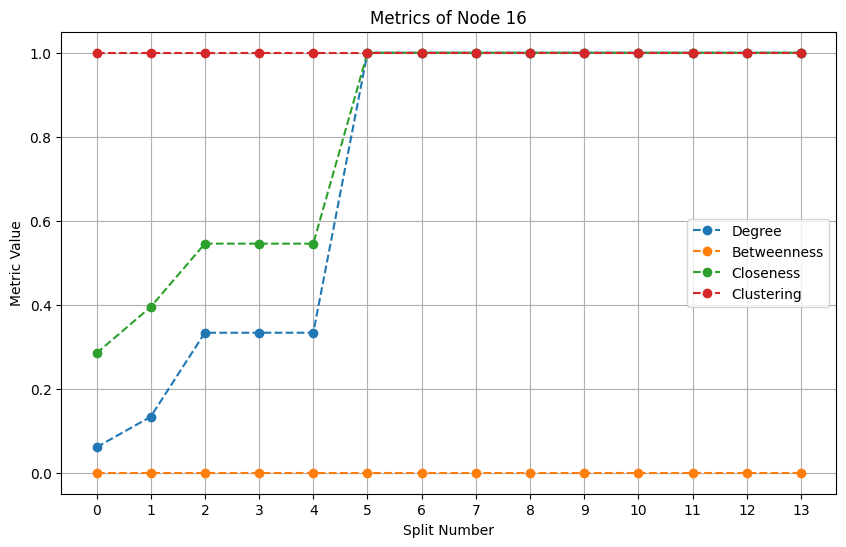

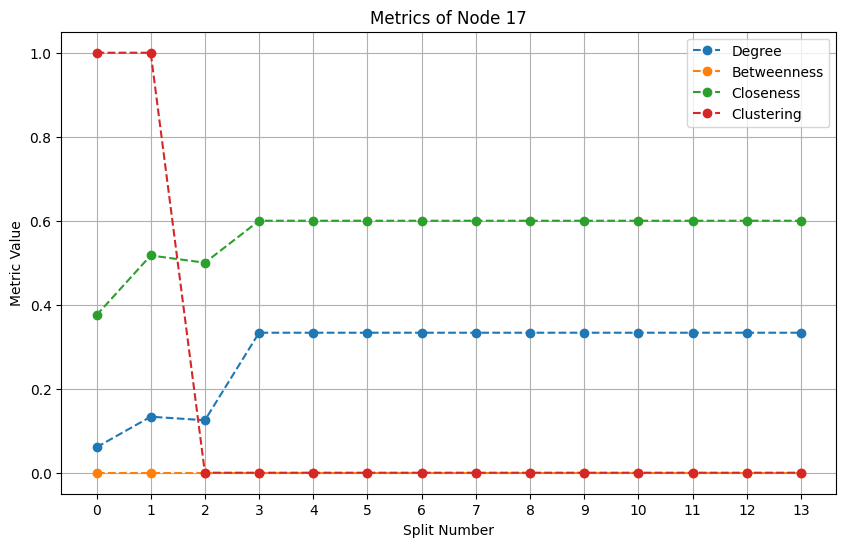

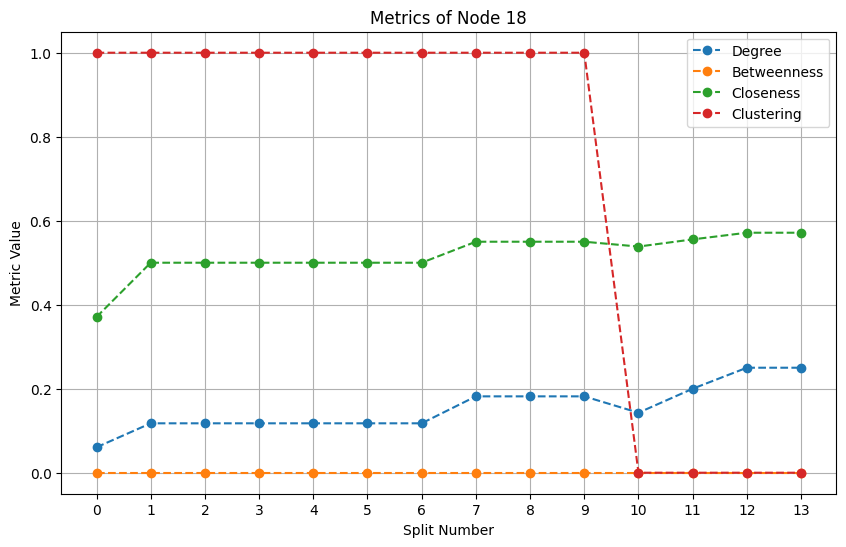

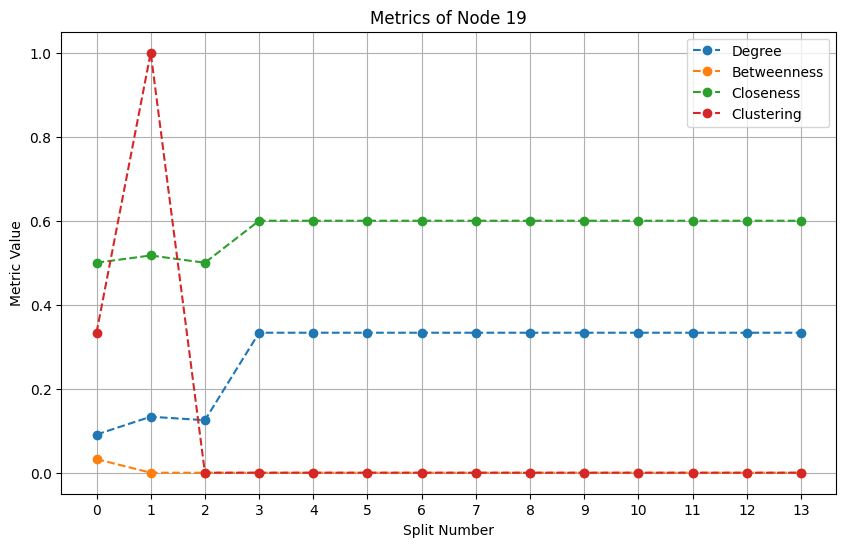

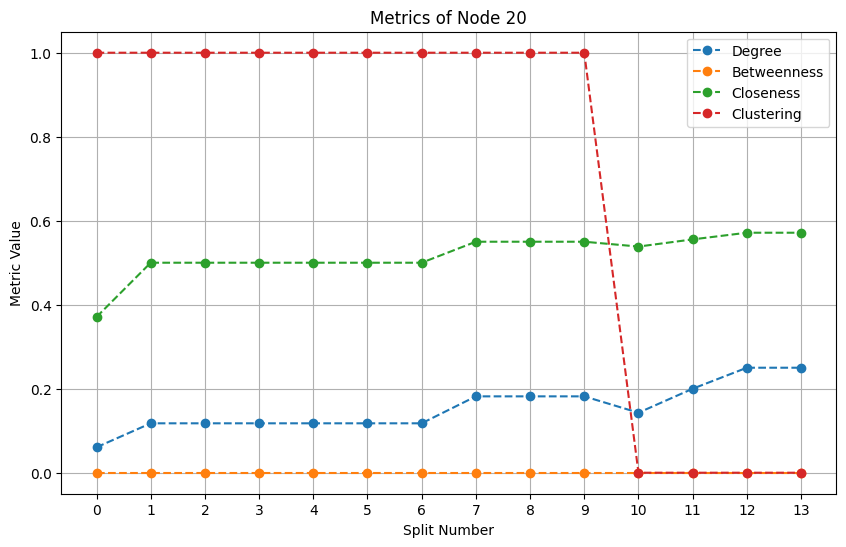

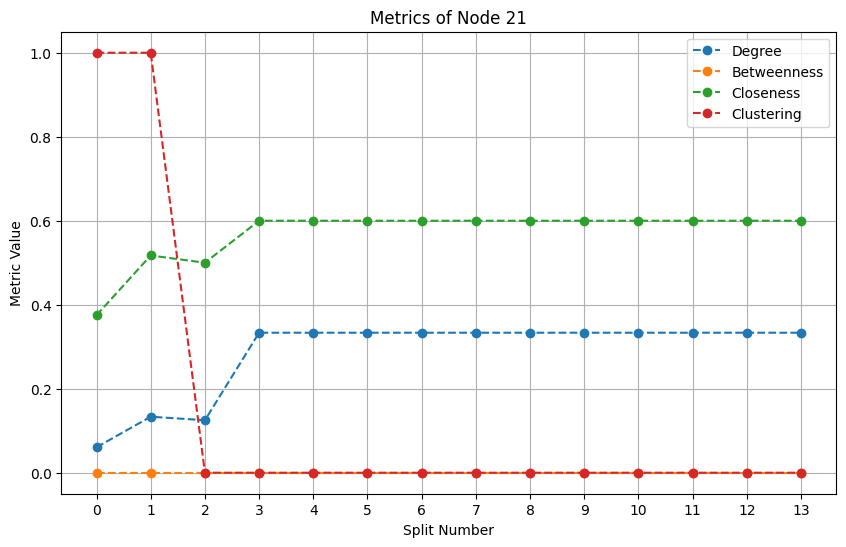

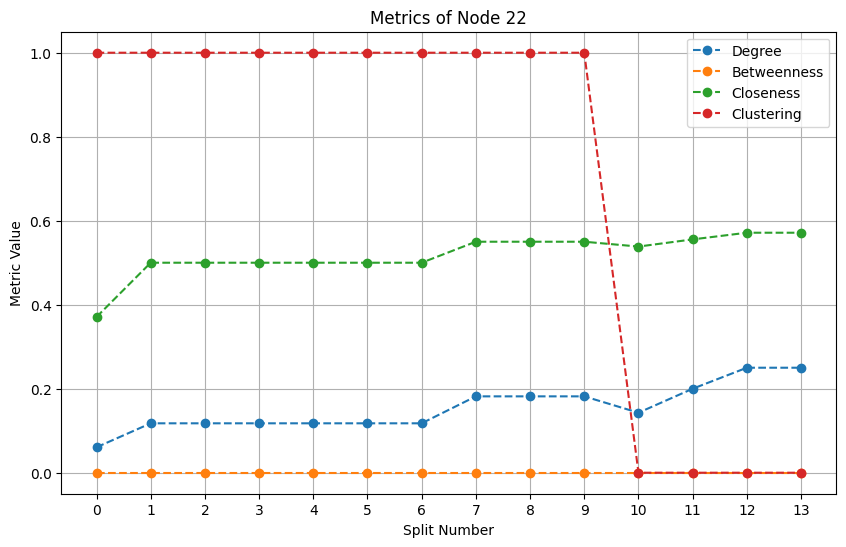

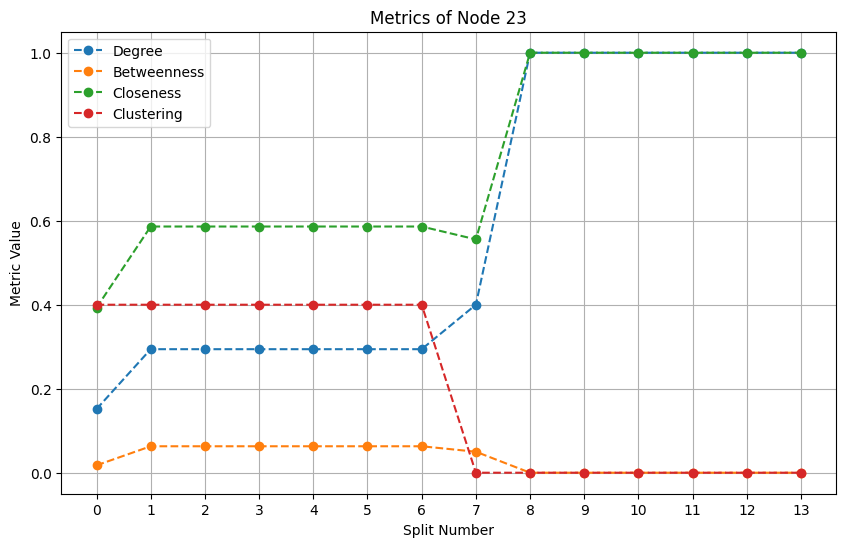

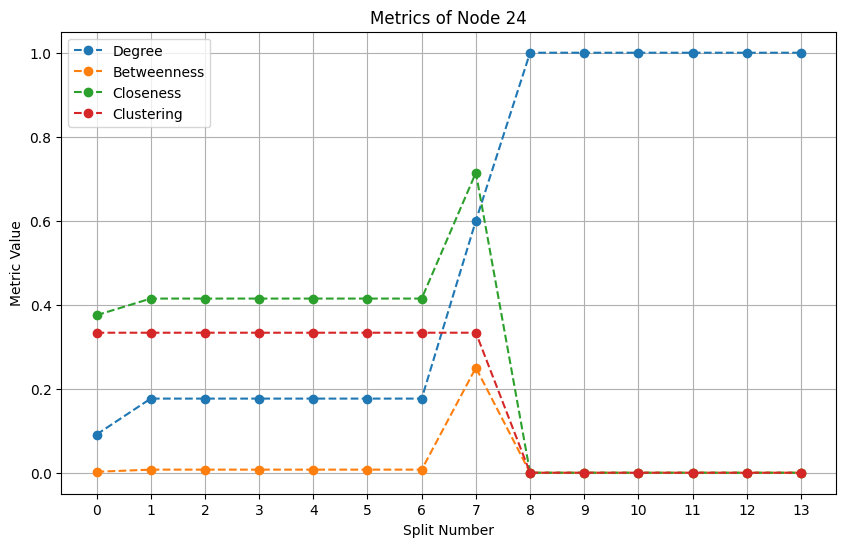

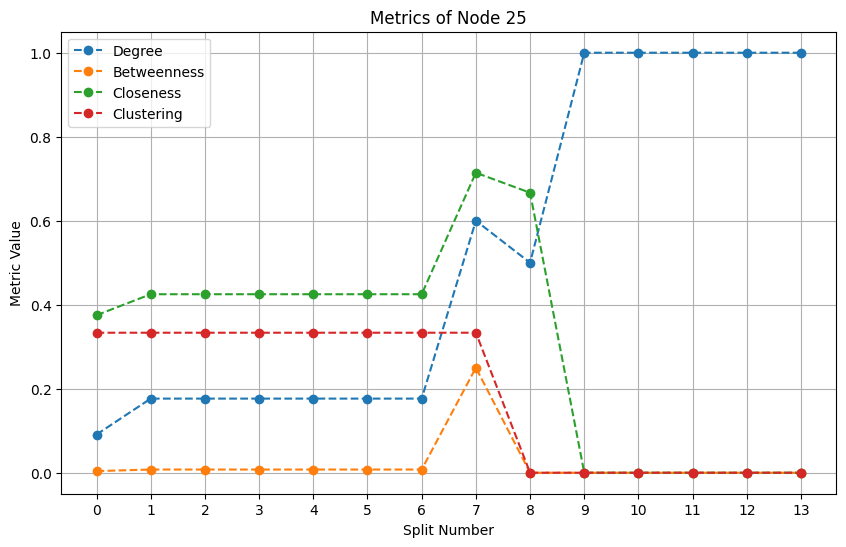

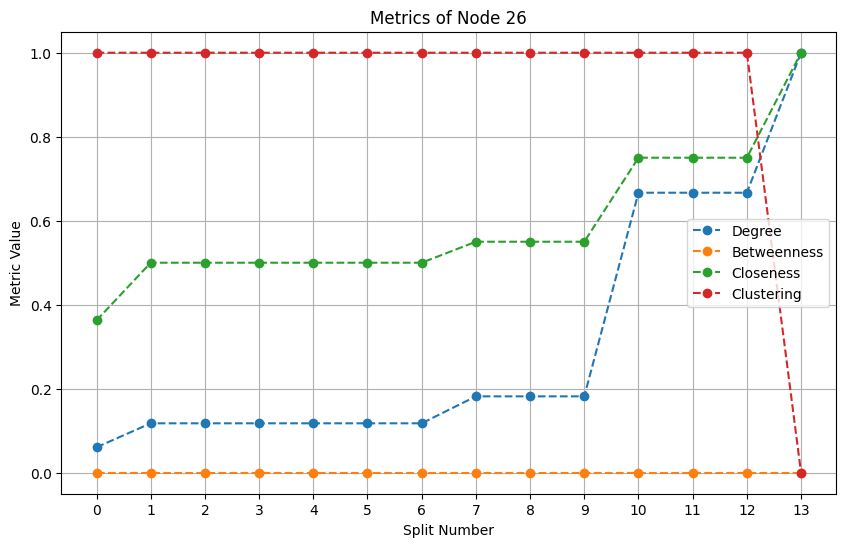

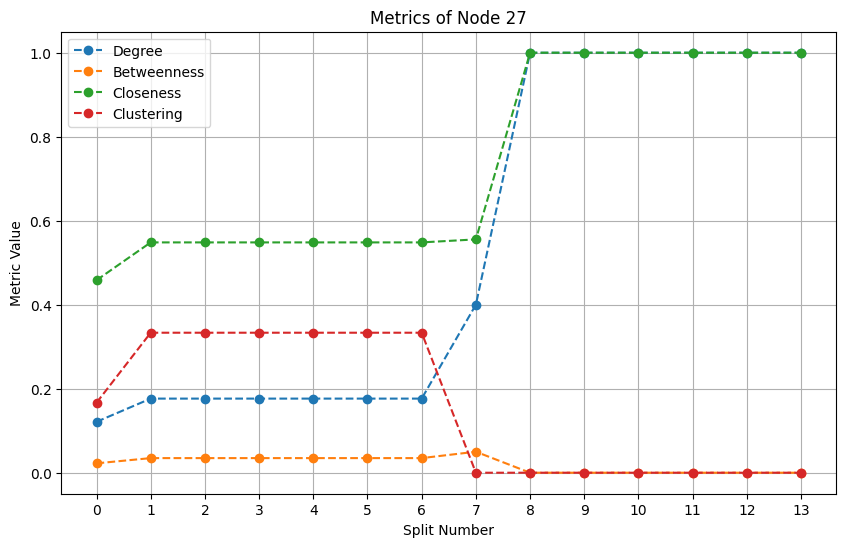

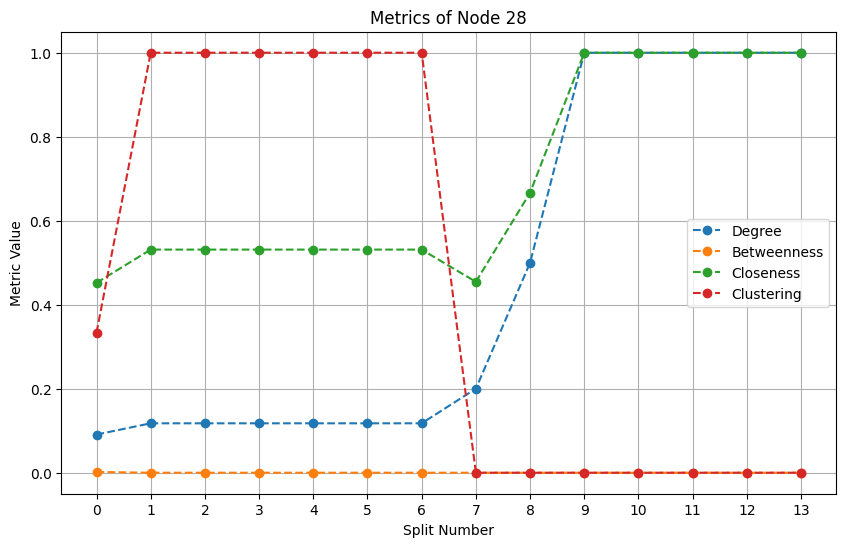

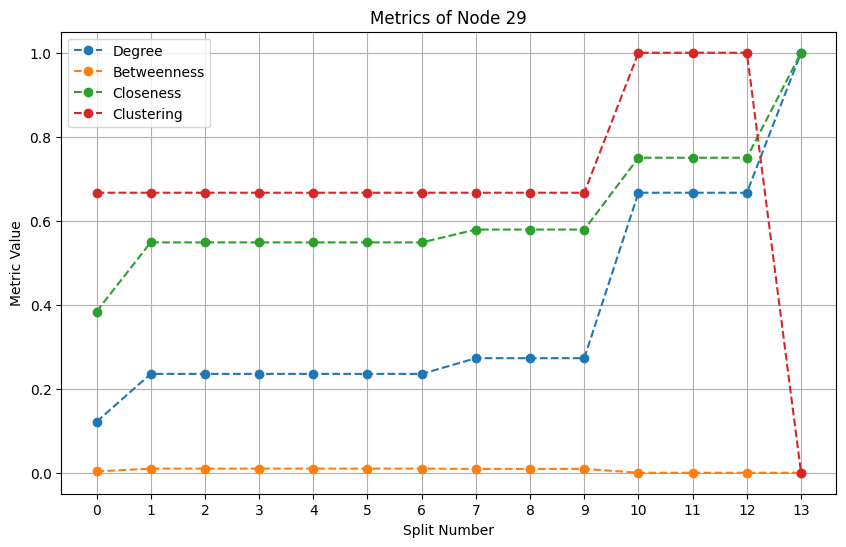

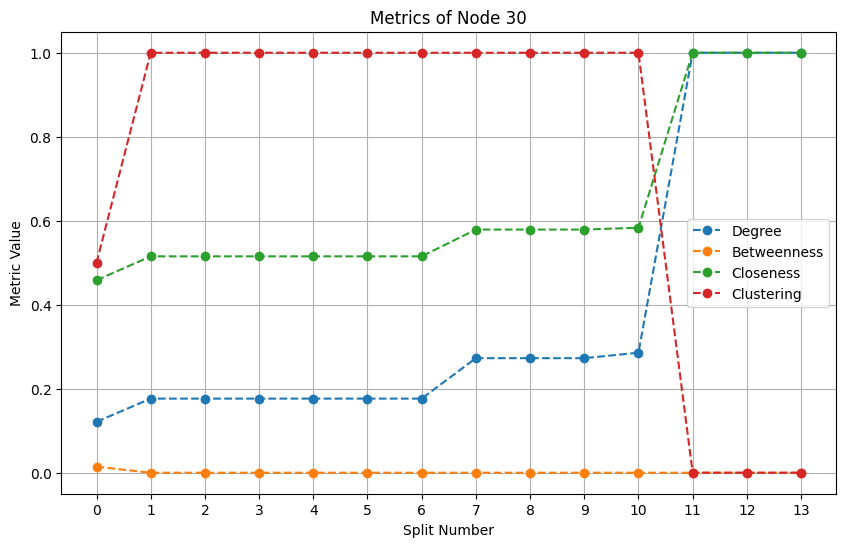

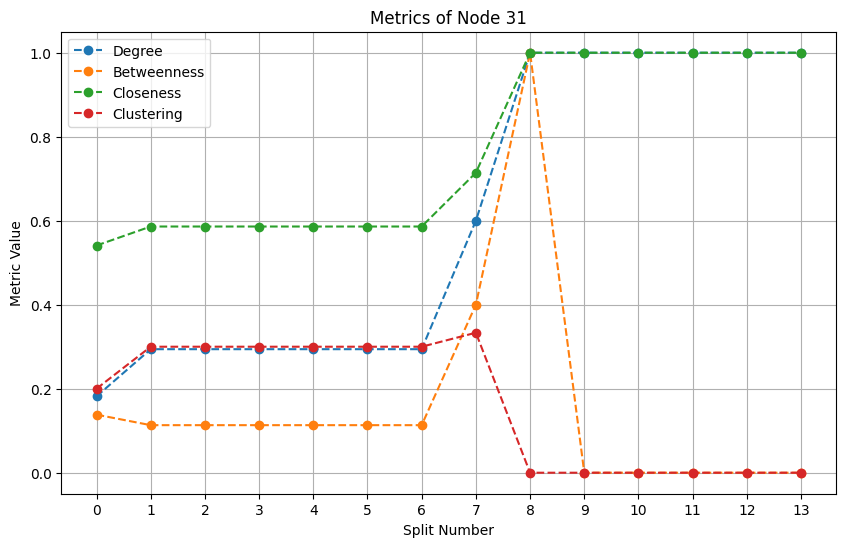

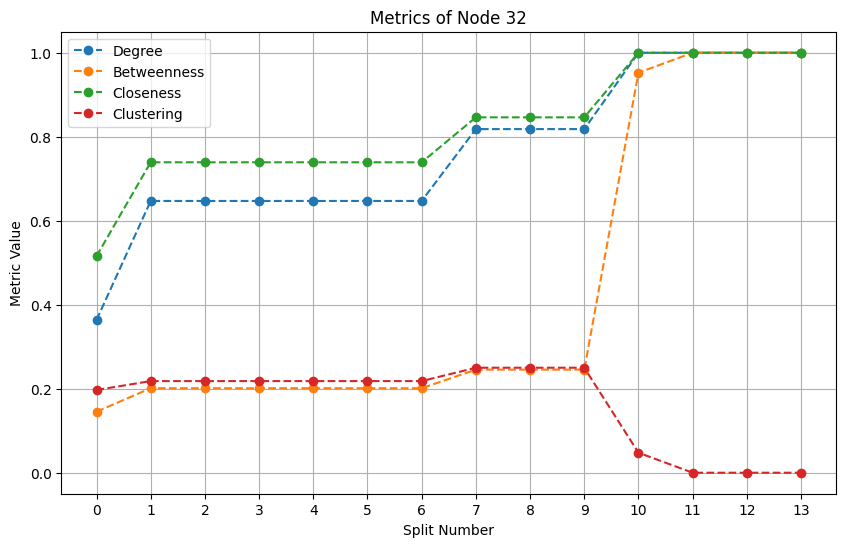

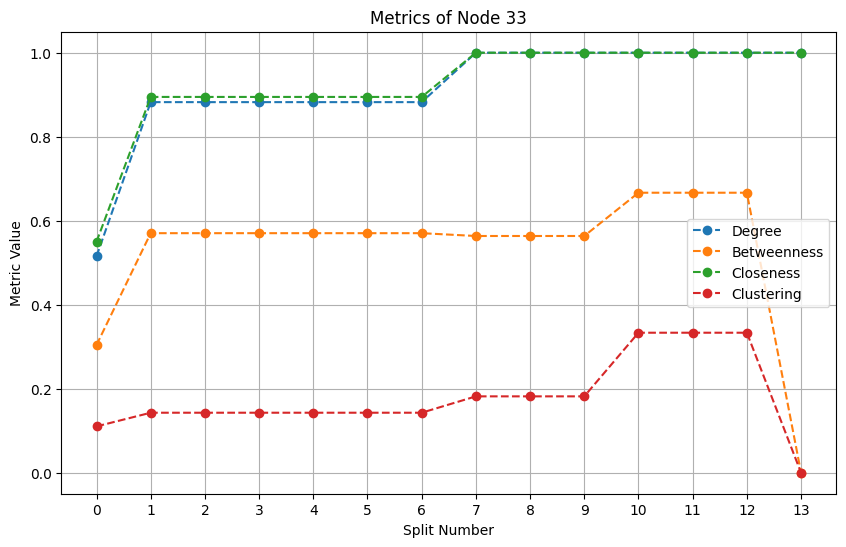

In [119]:
for i in range(34):
    node=i 
    metrics=['degree', 'betweenness', 'closeness', 'clustering']
    plot.figure(figsize=(10, 6))
    plot.title(f"Metrics of Node {node}")
    plot.xlabel("Split Number")
    plot.ylabel("Metric Value")
    all_splits = set() 
    for metric in metrics:
        node_data=metric_history[metric][node]
        splits=sorted(node_data.keys())
        values=[node_data[s] for s in splits]
        all_splits.update(splits)
        plot.plot(splits, values, marker='o', linestyle='--', label=metric.capitalize())
    plot.xticks(sorted(list(all_splits))) 
    plot.grid(True)
    plot.legend() 
    plot.show()

***Inferences:***
            None of the nodes in the graph remain unhinged throughout the splitting. Nodes 32, 1 and 2 have high degree centrality as they form the nodal regions of trees with all of the remaining nodes forming leaves. This implies that they form the backbone of each of these subgraphs. They also form key bridges to all other nodes in those subgraphs. All the subgraphs are tightly knit and have very short minimal paths between any two nodes. From the graph, the minimal path between any two nodes is not more than two, indicating that the splits are carried out exceptionally well. And, that commpletes the assignment project on modularity.


***Source material:***
            M.E.J. Newman, Modularity and community structure in networks, Proc. Natl. Acad. Sci. U.S.A. 103 (23) 8577-8582, https://doi.org/10.1073/pnas.0601602103 (2006).